In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import the one-hot encoded data.
data = pd.read_csv('../full_data_ohe.csv')
# An error from writing with index.
data = data.drop(columns=['Unnamed: 0'])
# Reset retained index.
data = data.reset_index(drop=True)
# Set NA to 0.
data['ct_ftp_cmd'] = data['ct_ftp_cmd'].fillna(0)

In [3]:
# Create groups for each mask.

# Normal values that are one position behind of a threat label.
df = data.copy()
m = (df['label'].shift(1) == 1)
x1 = df[(df['attack_cat'] == 'Normal') & m]

# Normal values that are one position infront of a threat label.
df = data.copy()
m = (df['label'].shift(-1) == 1)
x2 = df[(df['attack_cat'] == 'Normal') & m]

# Normal values that are atleast one position away from a threat label (both sides).
rs = 42
data2 = data.copy()
mask = (data2['label'].shift(-1) != 1) & (data2['label'].shift(1) != 1)
x3 = data2[(data2['attack_cat'] == 'Normal') & mask]

# Create same lenght data.
print(len(x1))
print(len(x2))
print(len(x3))
x2 = x2.sample(n=len(x1), random_state=123)
x3 = x3.sample(n=len(x1), random_state=123)
print(len(x1))
print(len(x2))
print(len(x3))
x1 = x1.reset_index(drop=True)
x2 = x2.reset_index(drop=True)
x3 = x3.reset_index(drop=True)

30930
30931
2156976
30930
30930
30930


In [4]:
# Select numerical features.
numerical_features = ['dur', 'sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'sload', 'dload', 'spkts', 'dpkts',
                      'swin', 'dwin', 'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'sjit',
                      'djit', 'stime', 'ltime', 'sintpkt', 'dintpkt', 'tcprtt', 'synack' , 'ackdat', 'ct_srv_src', 
                      'ct_srv_dst', 'ct_dst_ltm', 'ct_src_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

x1 = x1[numerical_features]
x2 = x2[numerical_features]
x3 = x3[numerical_features]

# Before Threat Row

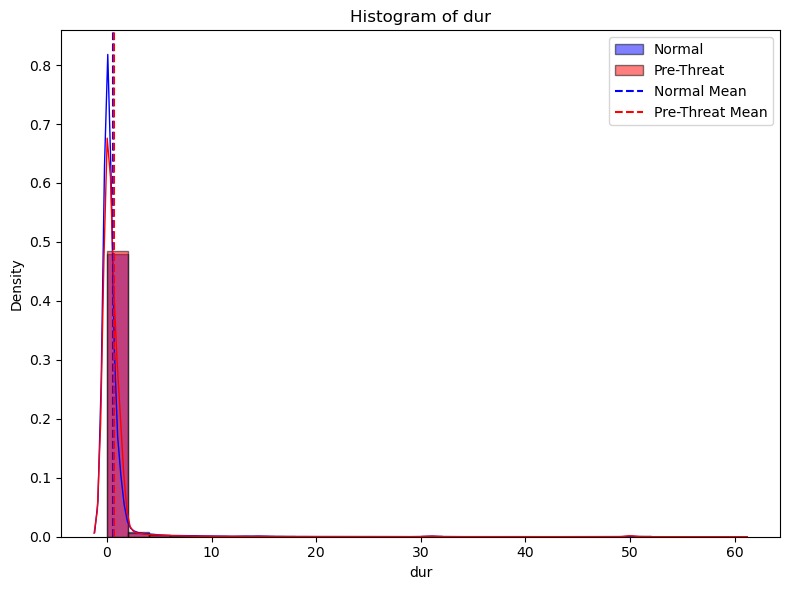

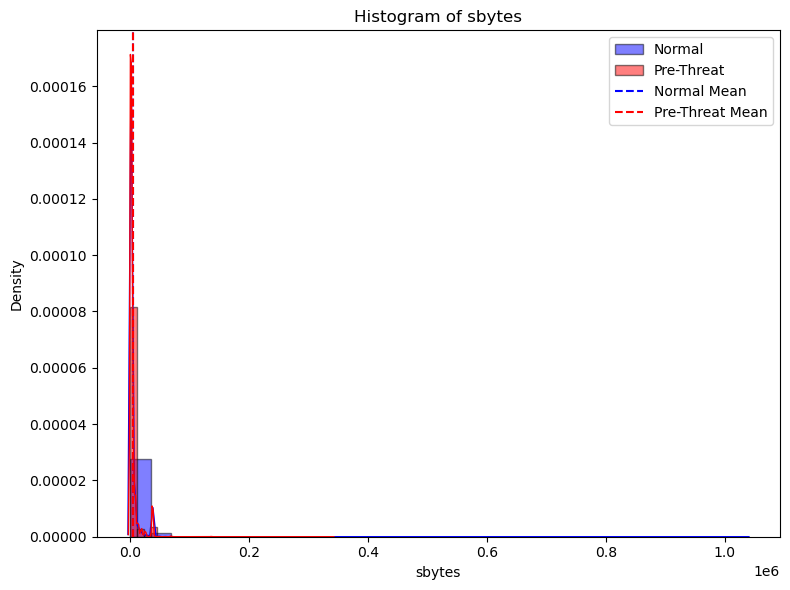

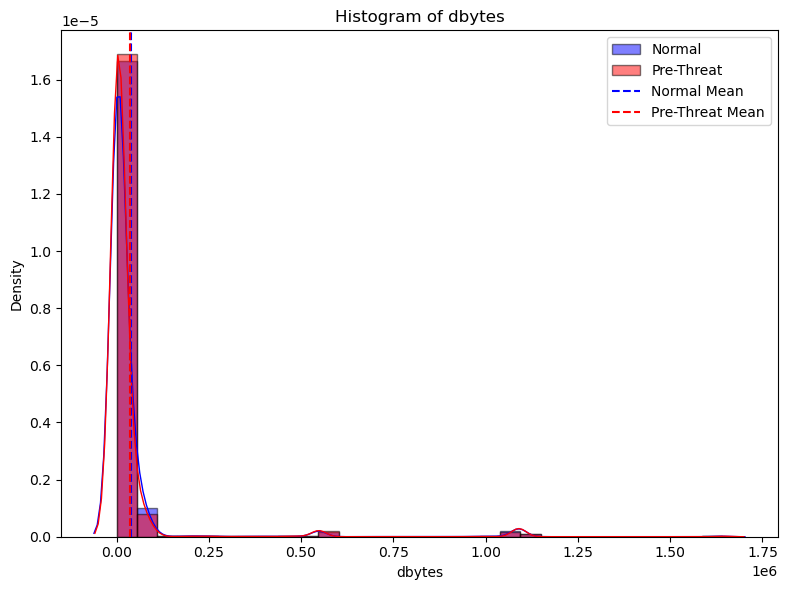

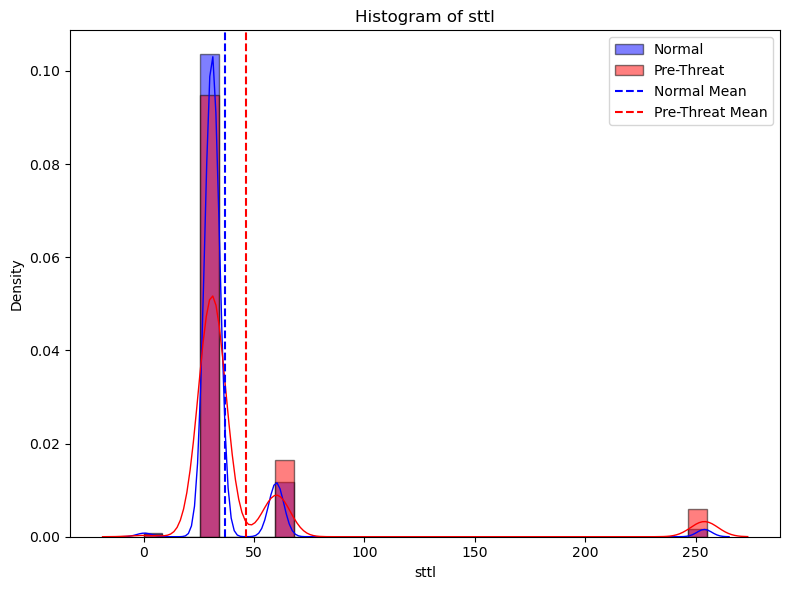

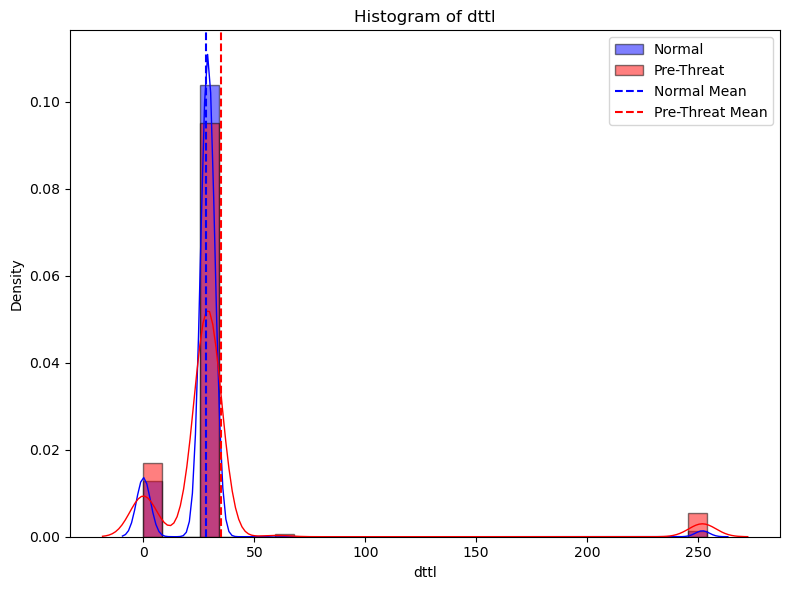

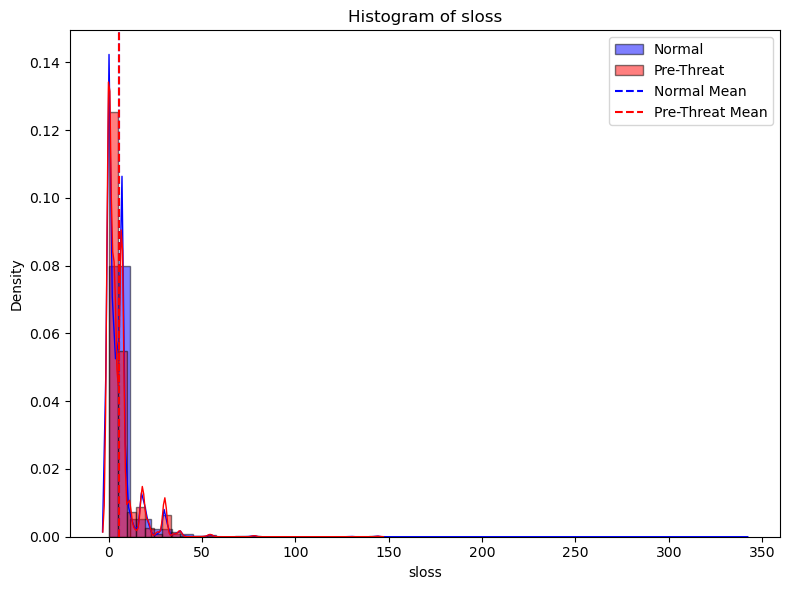

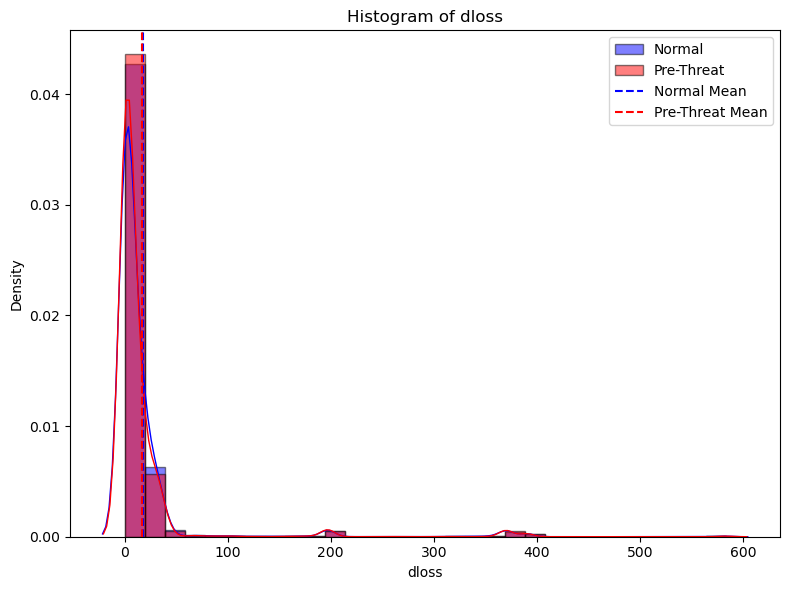

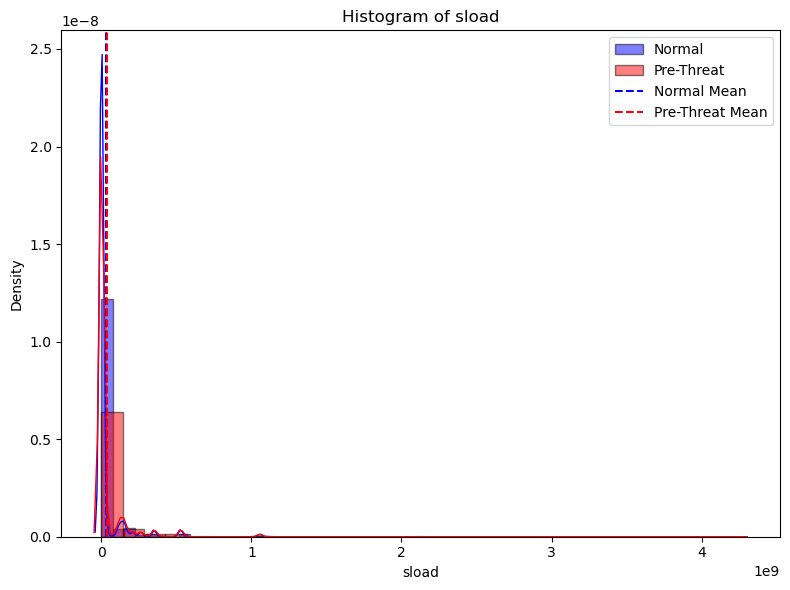

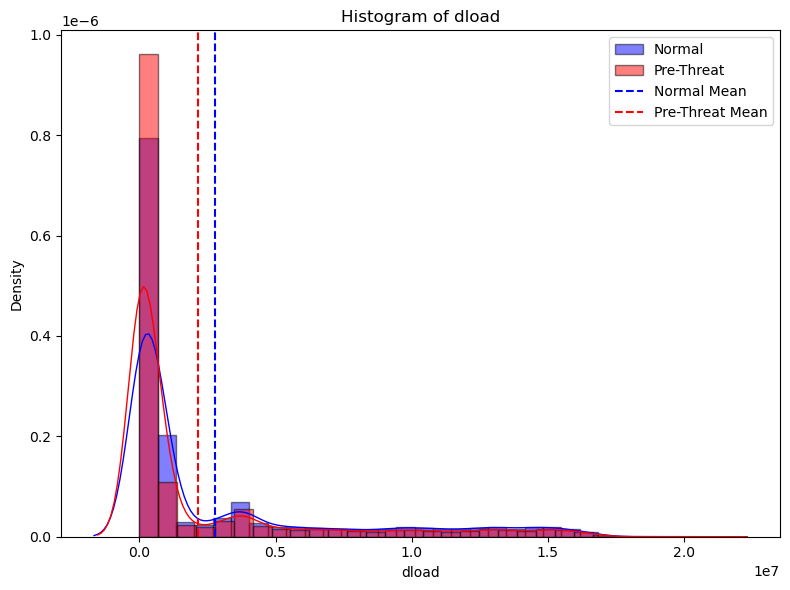

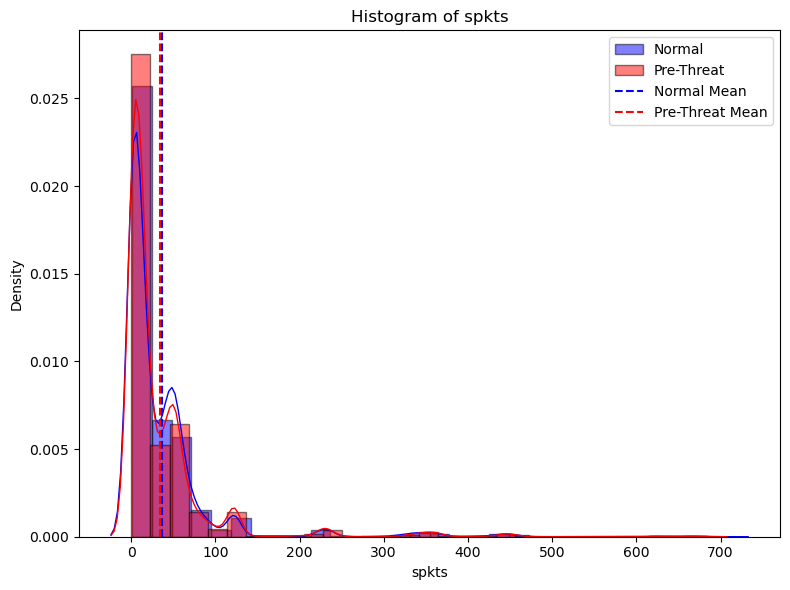

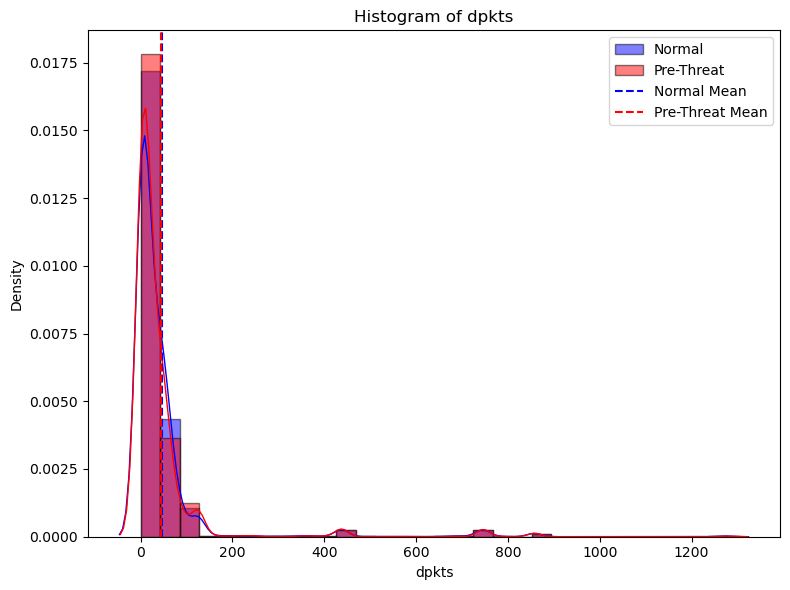

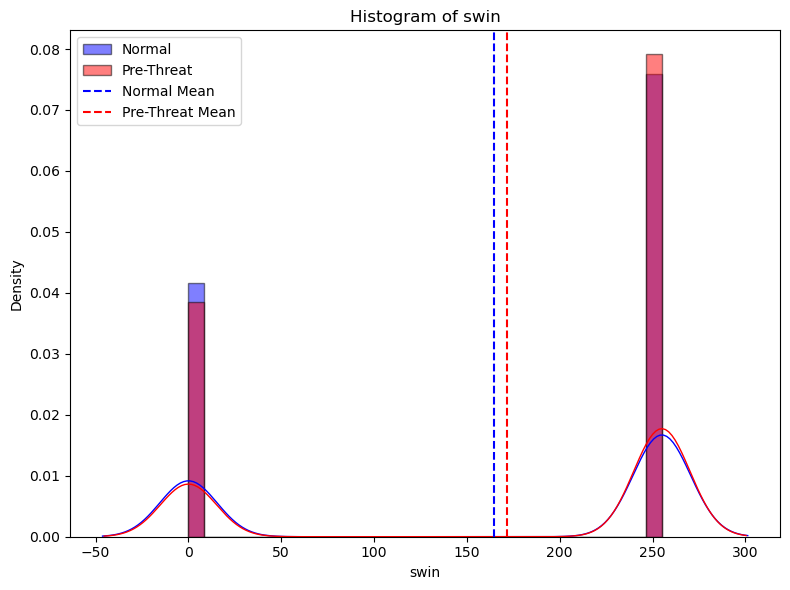

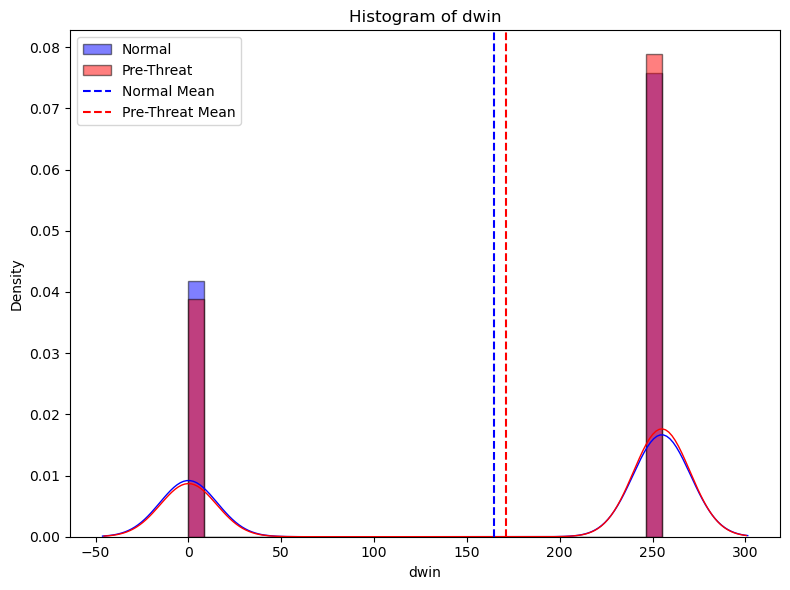

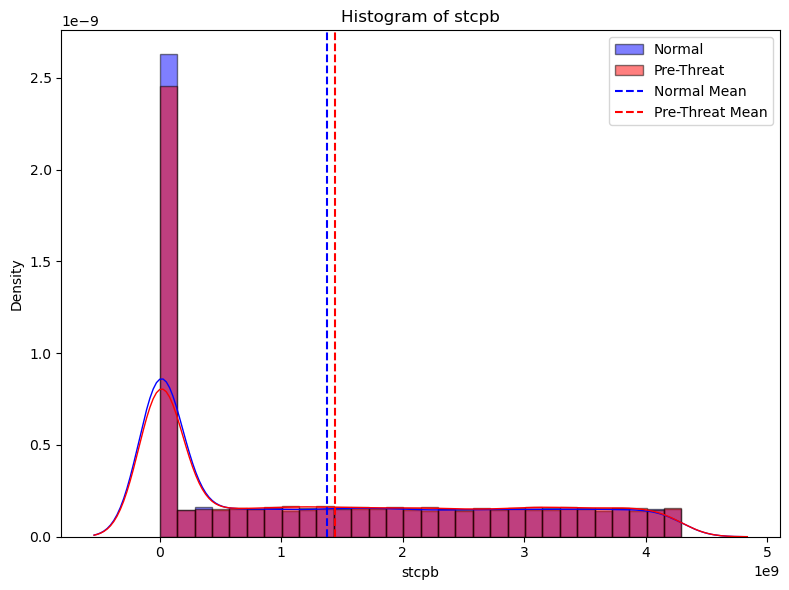

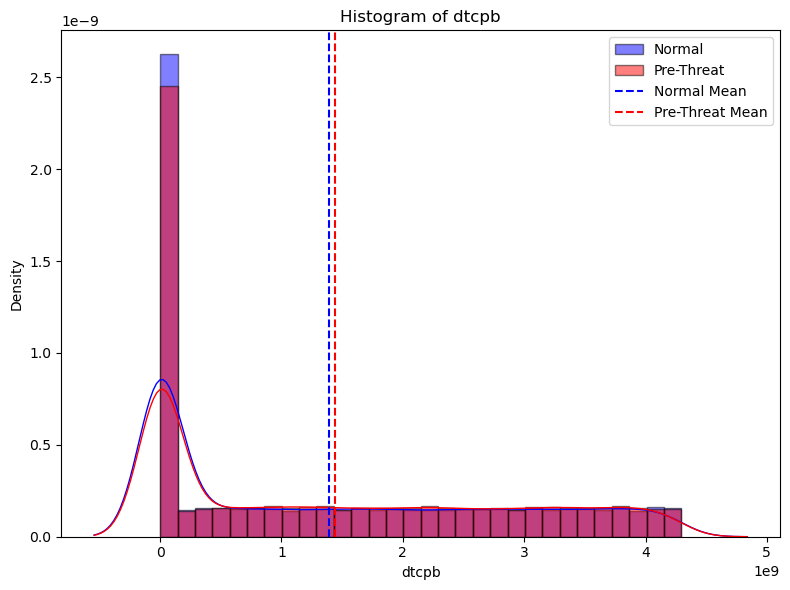

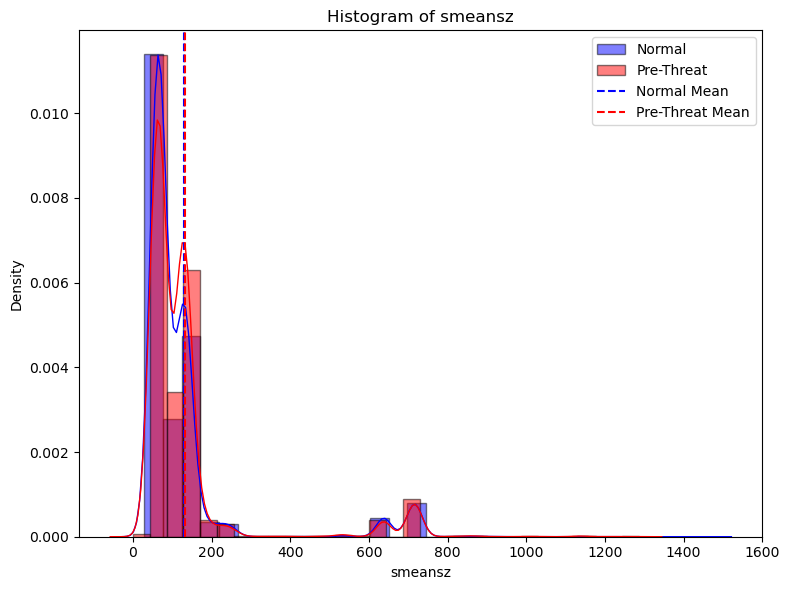

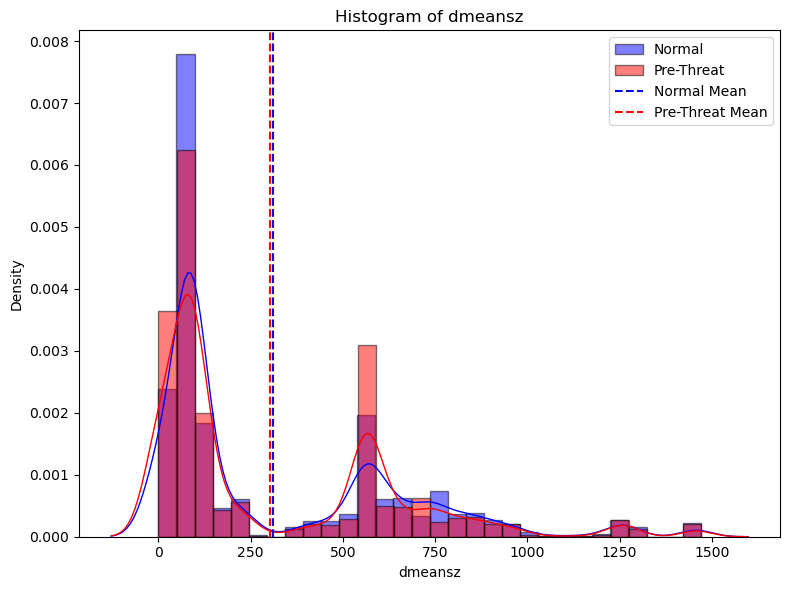

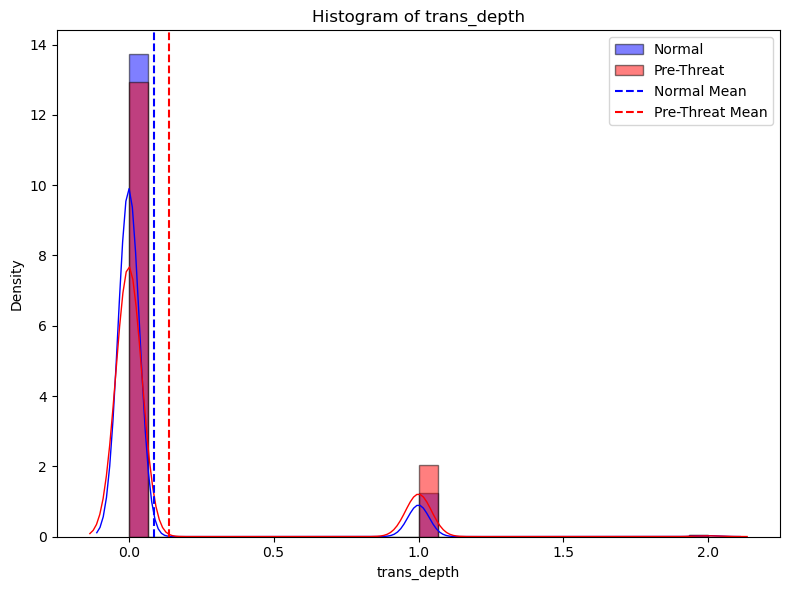

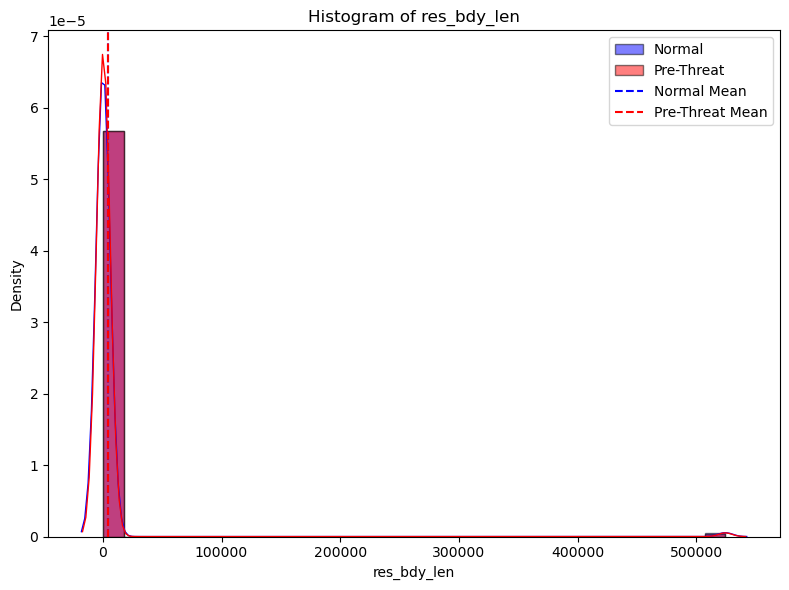

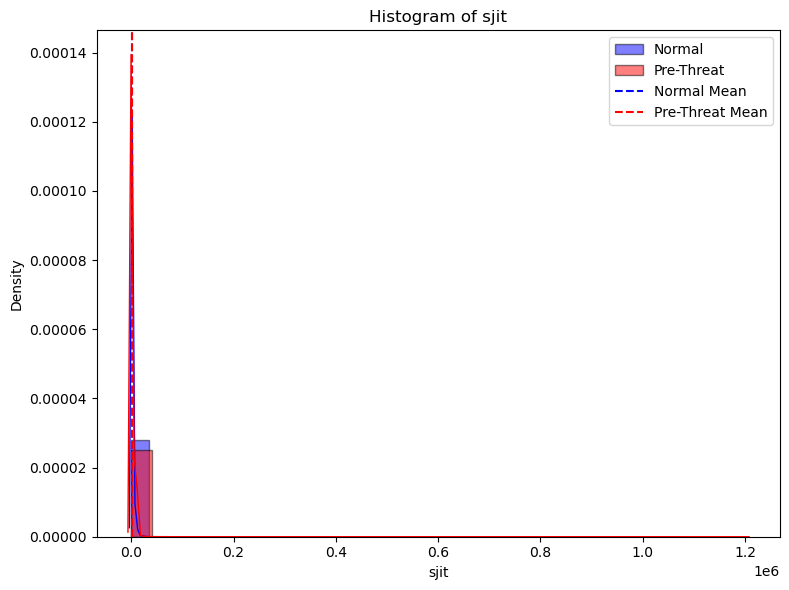

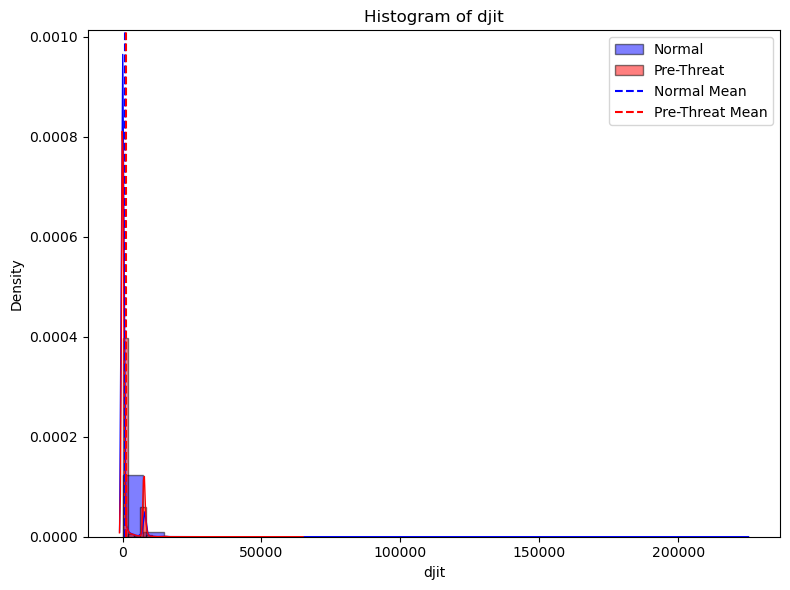

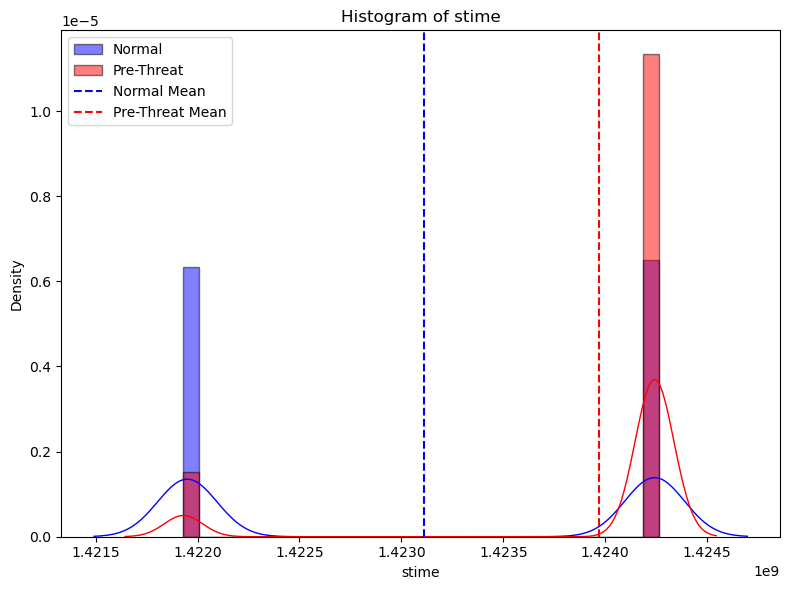

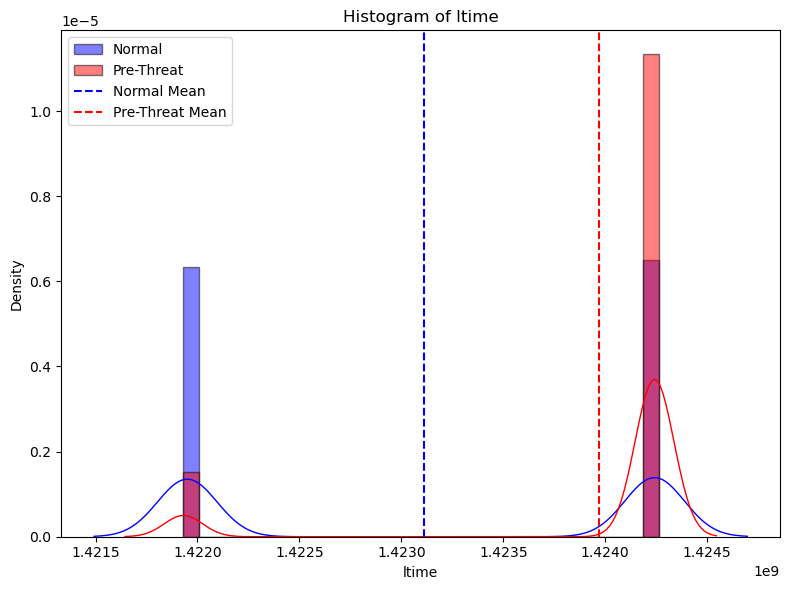

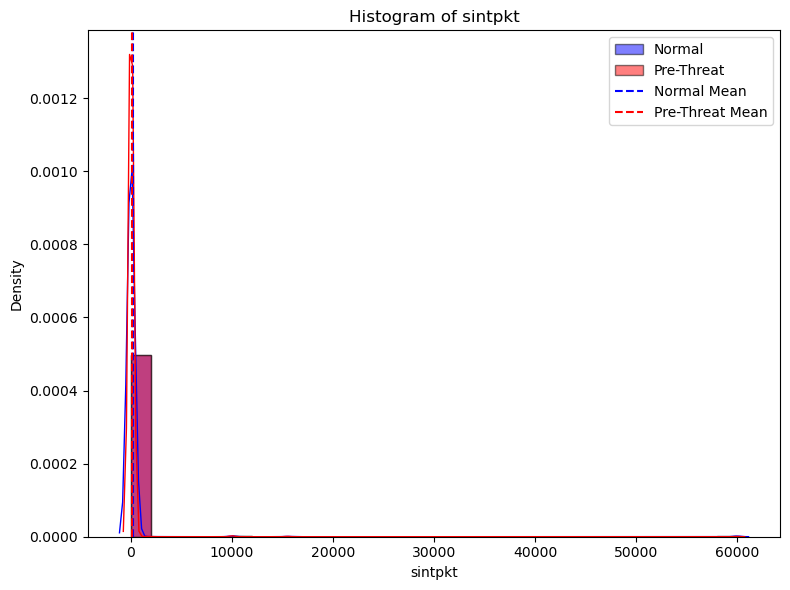

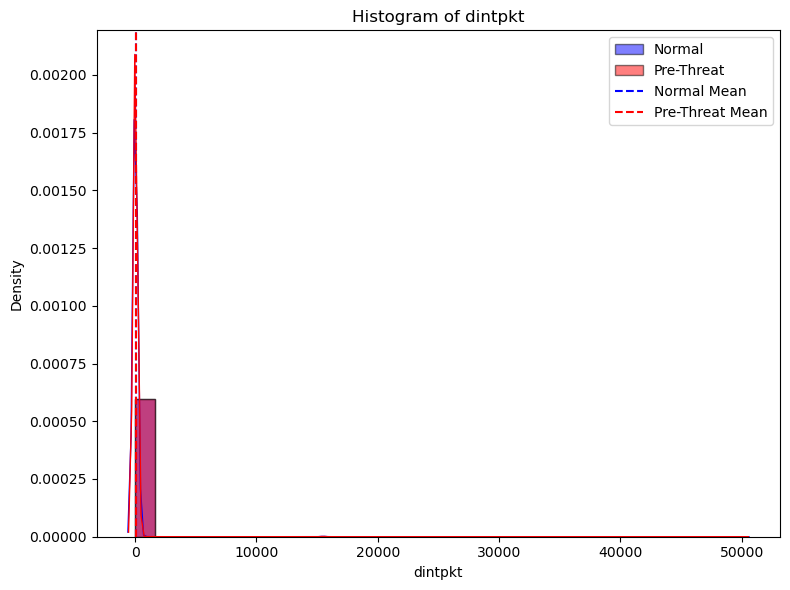

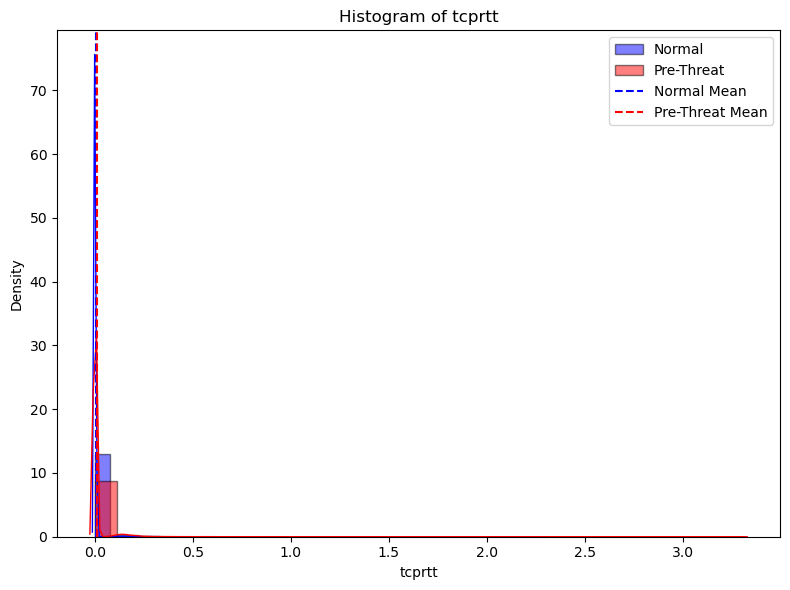

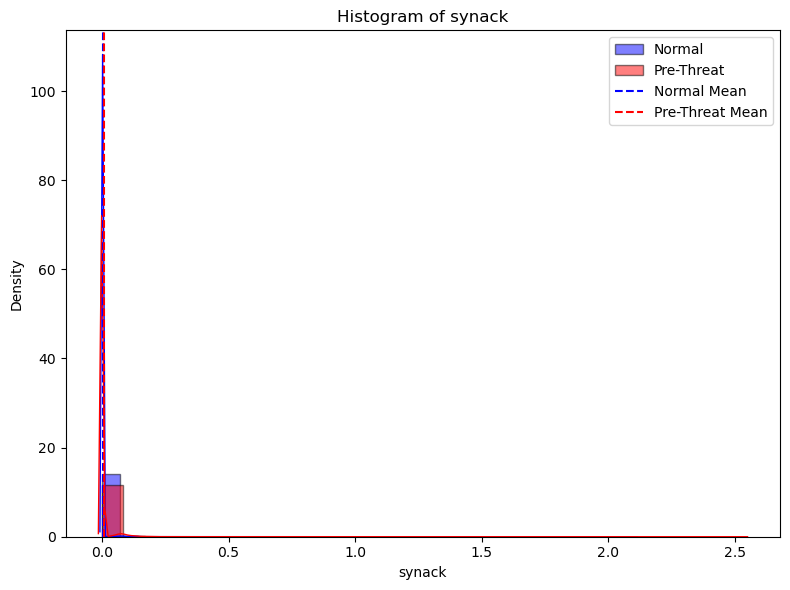

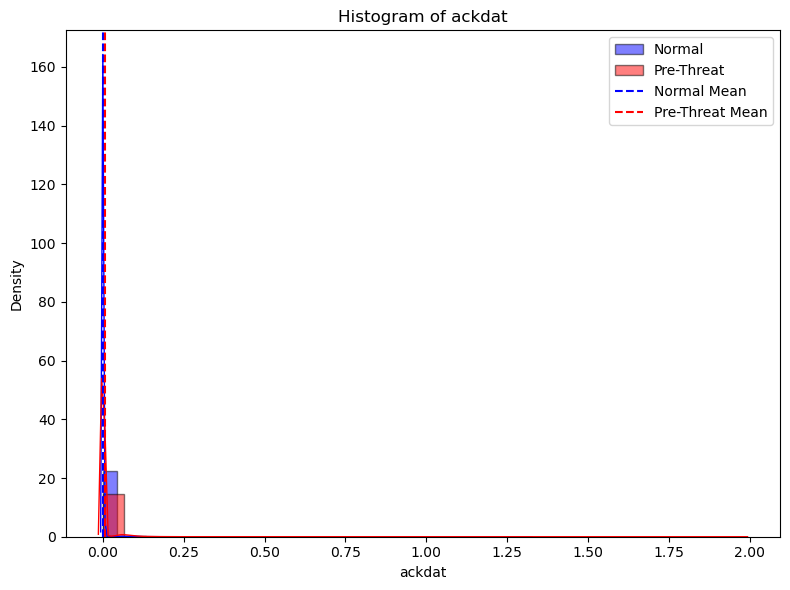

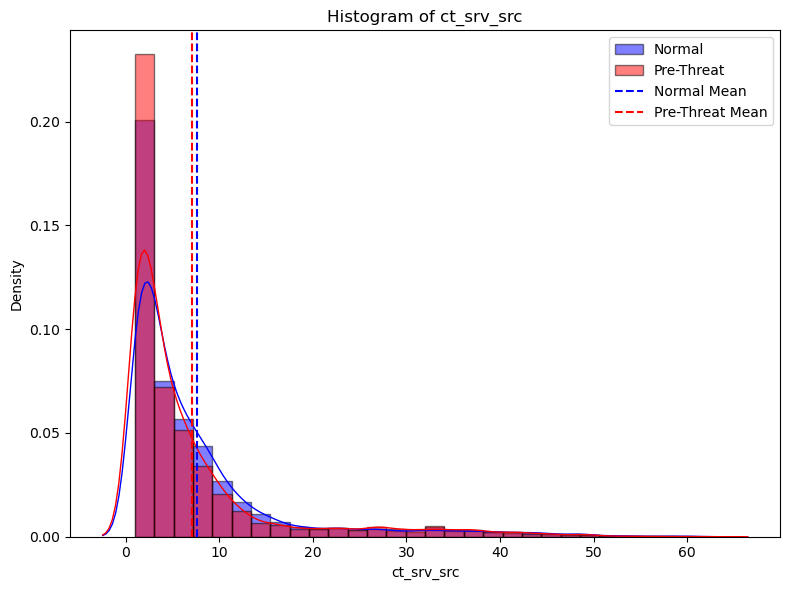

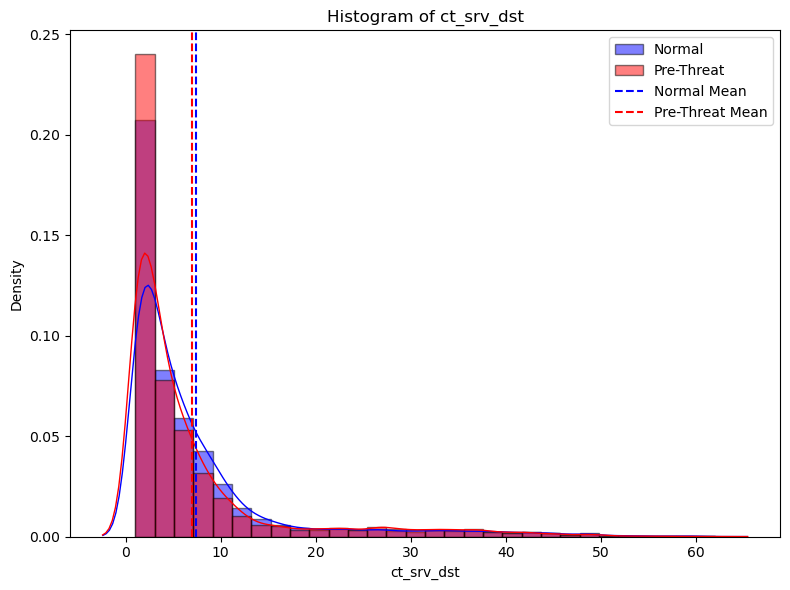

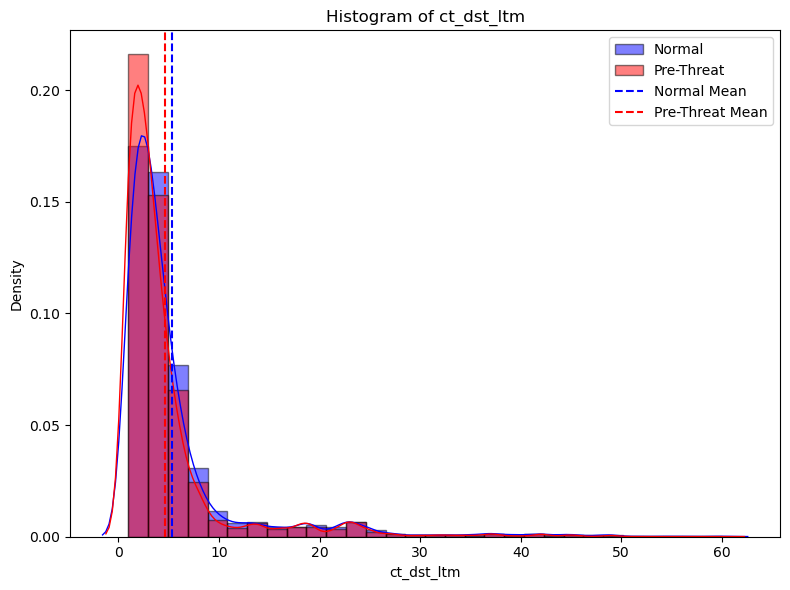

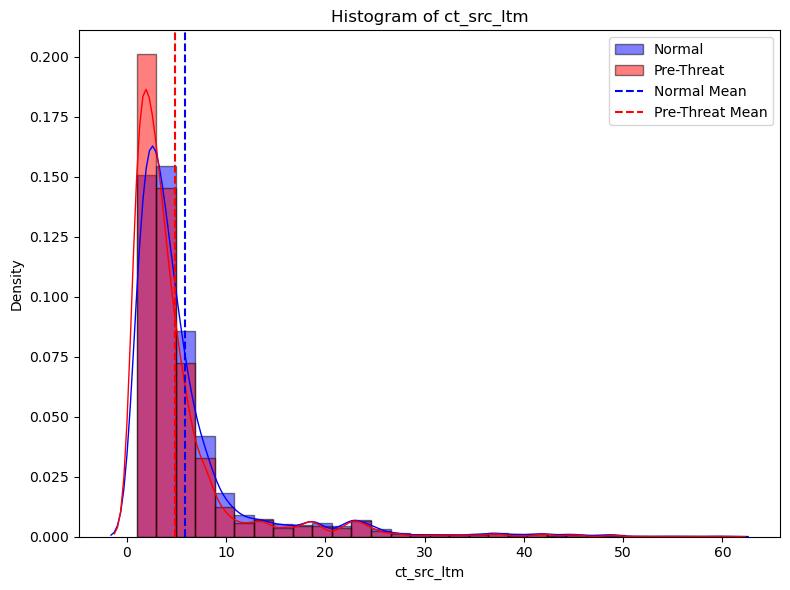

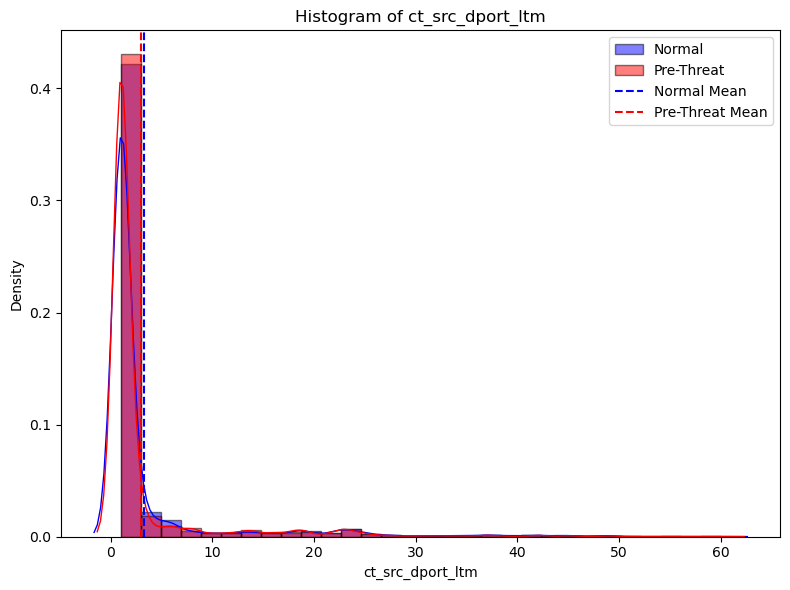

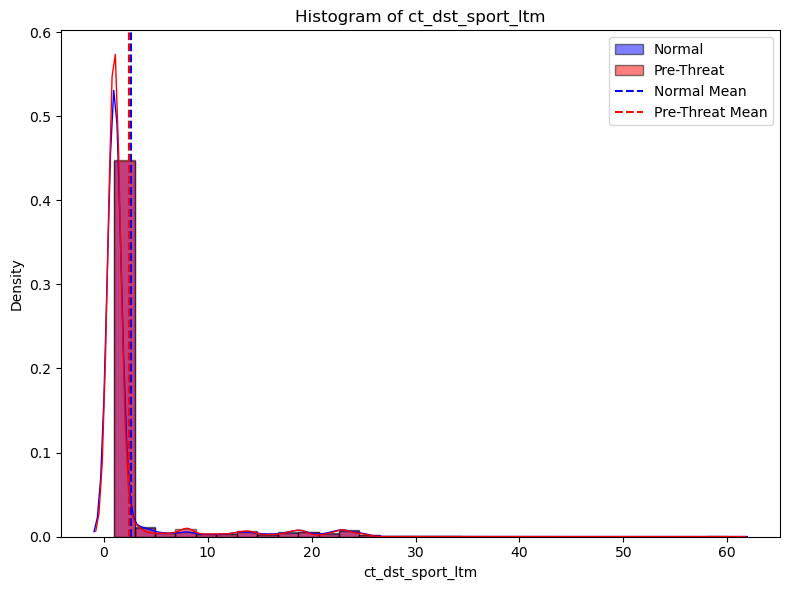

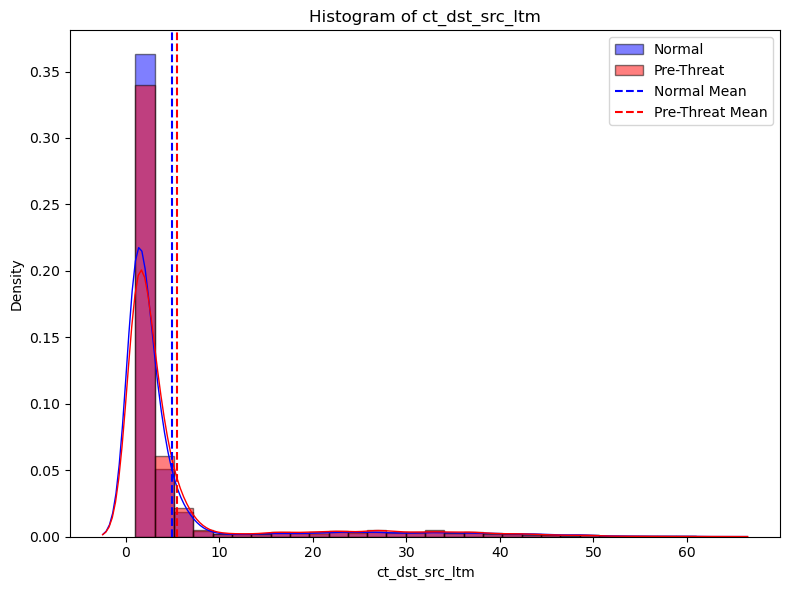

In [5]:
num_features = len(numerical_features)
# Go through each Normal and Pre-Threat Normal value and compare on histogram.
# No obvious difference seem to be found except for stime and ltime.
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(x3[feature], bins=30, alpha=0.5, label='Normal', color='blue', edgecolor='black', density=True)
    plt.hist(x1[feature], bins=30, alpha=0.5, label='Pre-Threat', color='red', edgecolor='black', density=True)
    sns.kdeplot(x3[feature], color='blue', linewidth=1)
    sns.kdeplot(x1[feature], color='red', linewidth=1)
    mean_x3 = np.mean(x3[feature])
    mean_x1 = np.mean(x1[feature])
    plt.axvline(mean_x3, color='blue', linestyle='--', label='Normal Mean')
    plt.axvline(mean_x1, color='red', linestyle='--', label='Pre-Threat Mean')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# After Threat Row

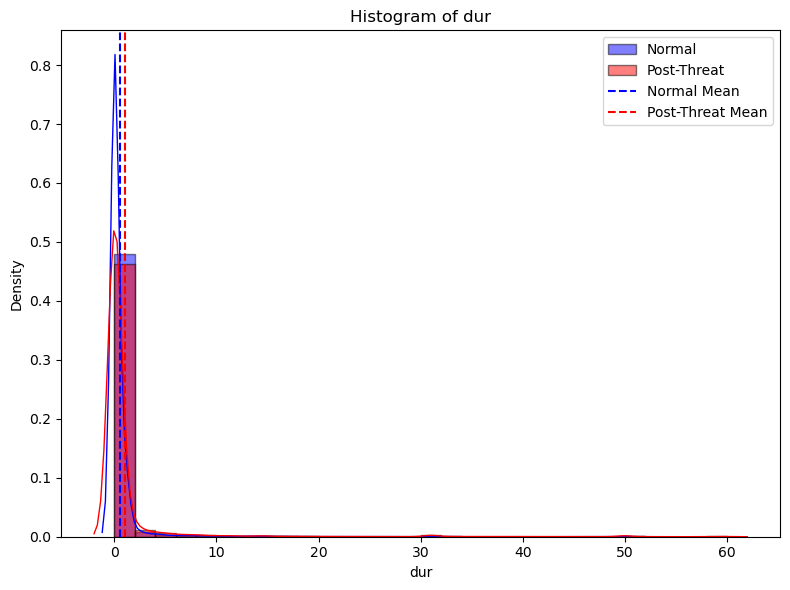

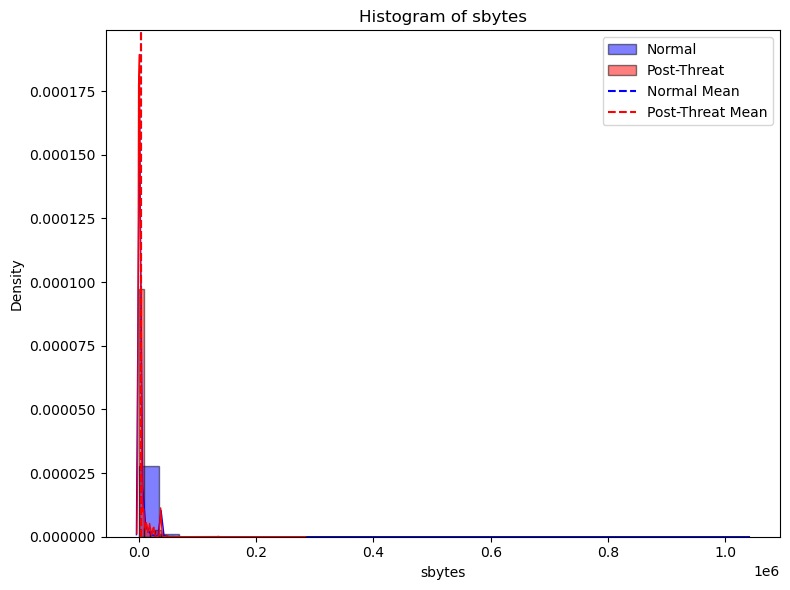

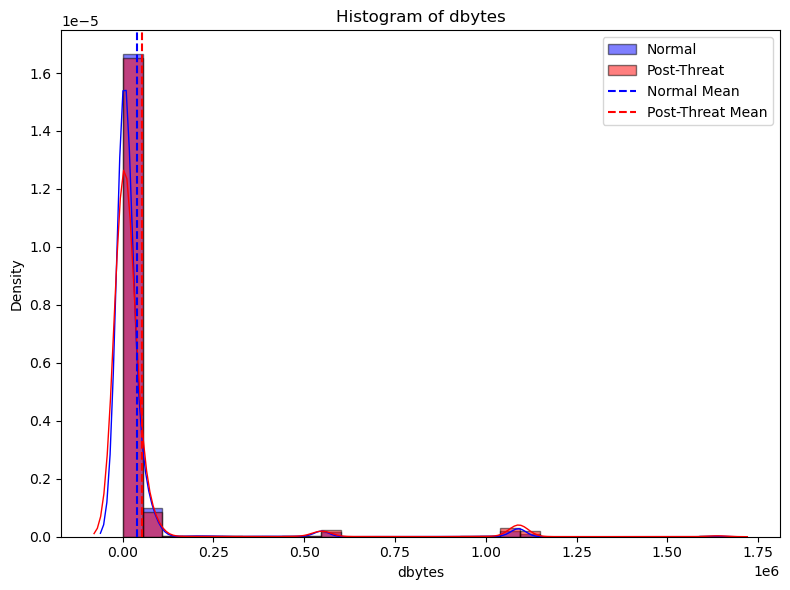

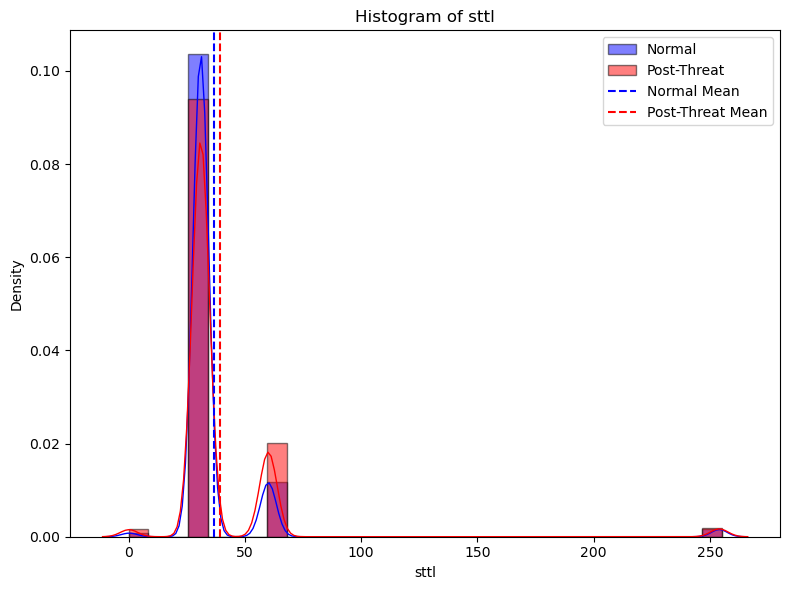

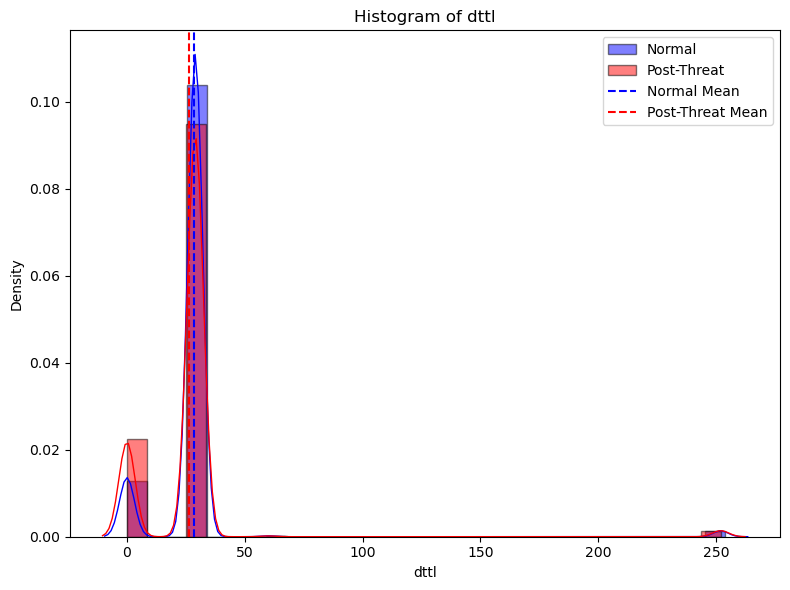

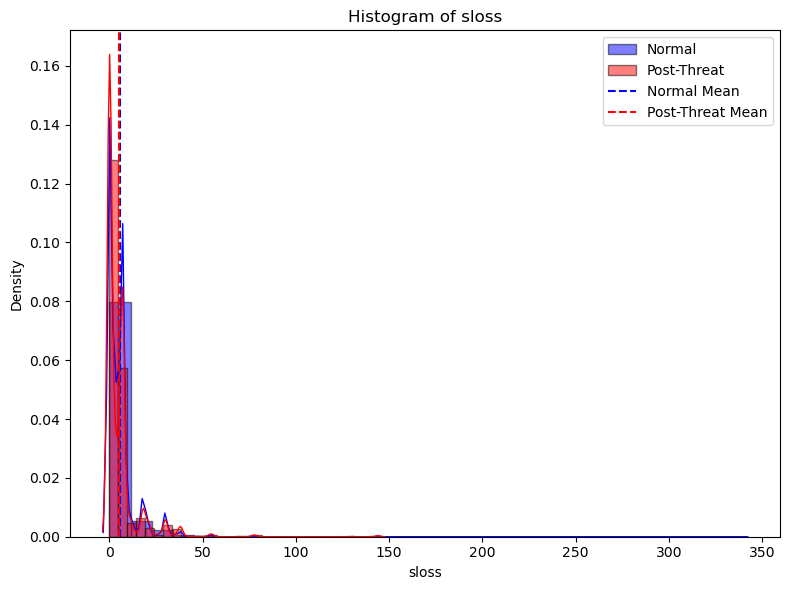

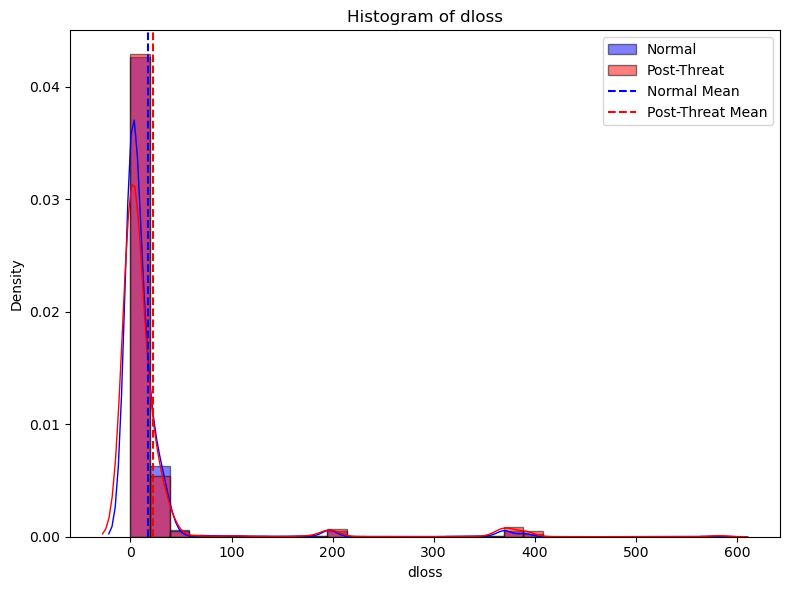

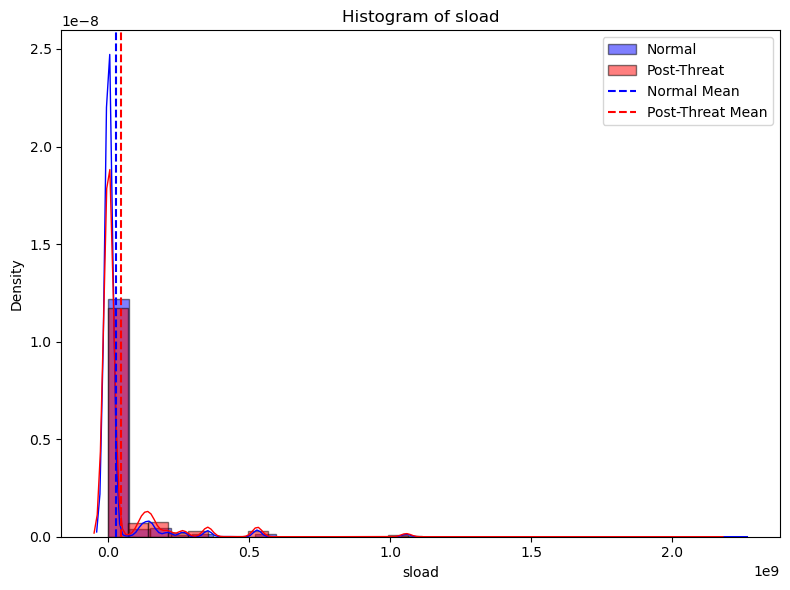

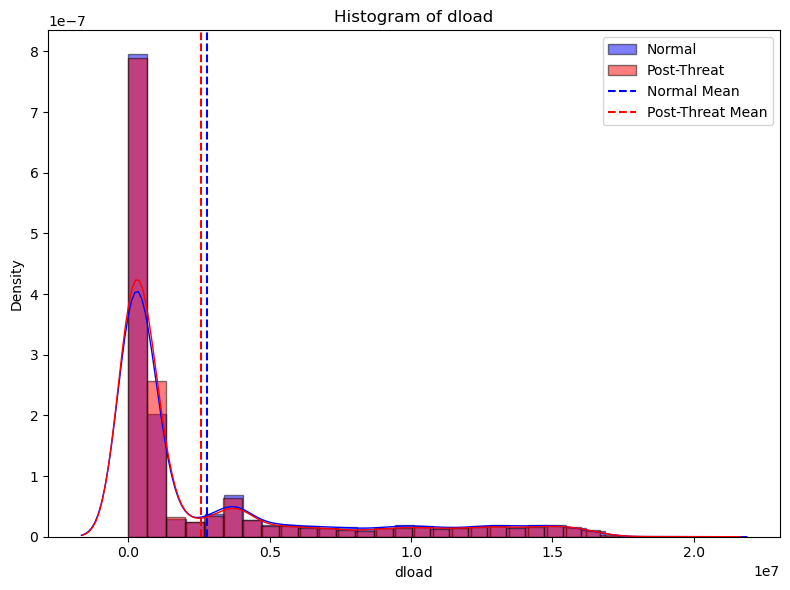

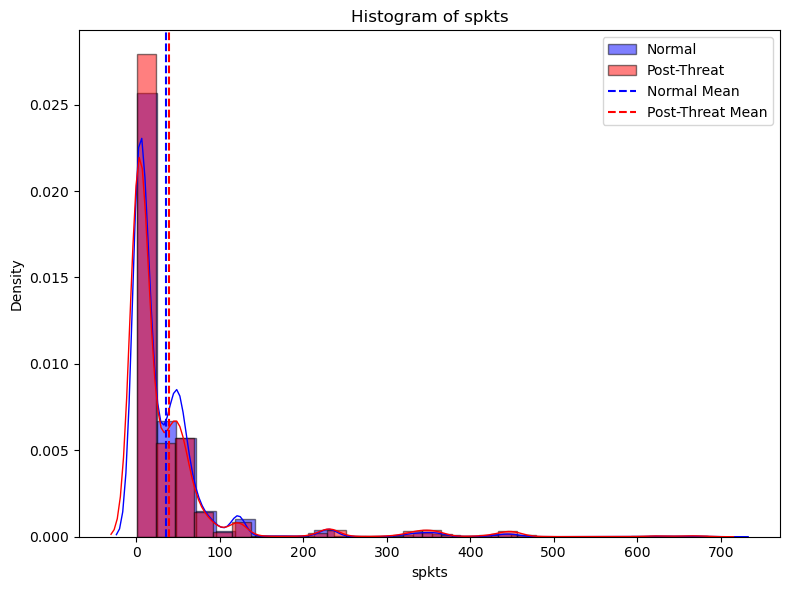

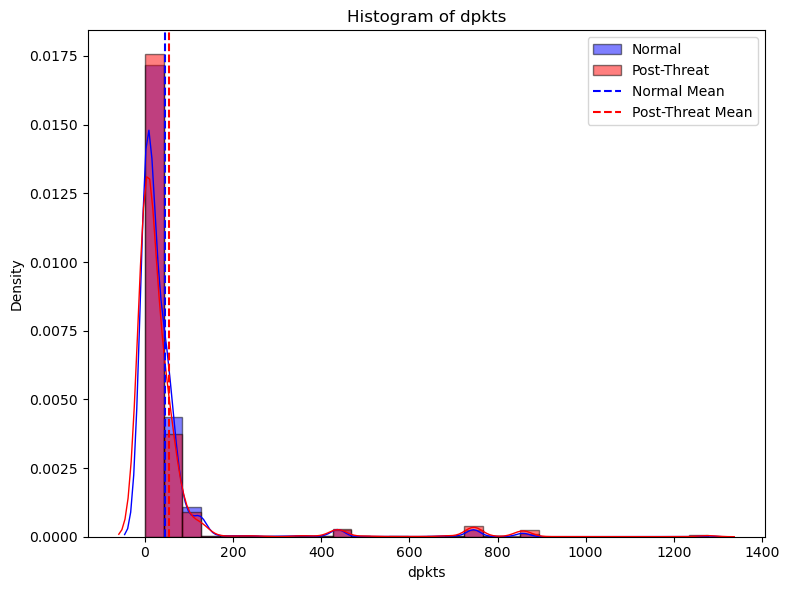

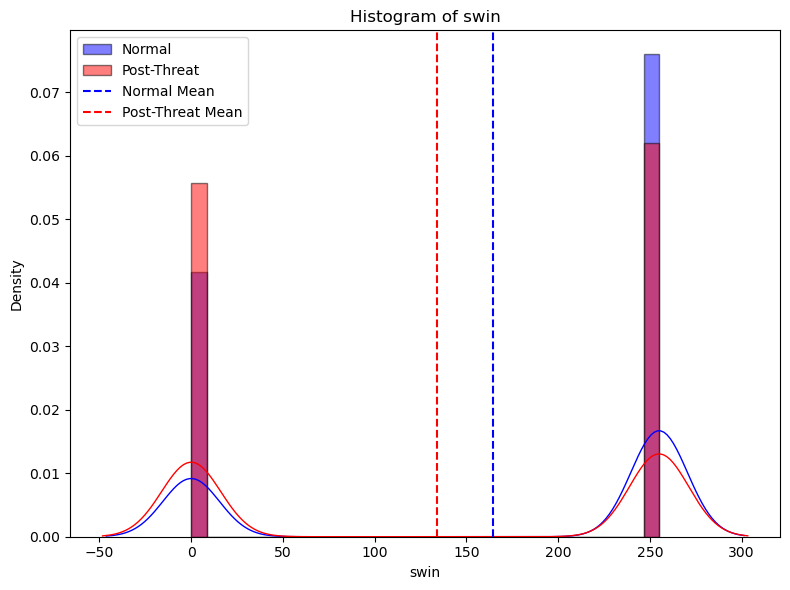

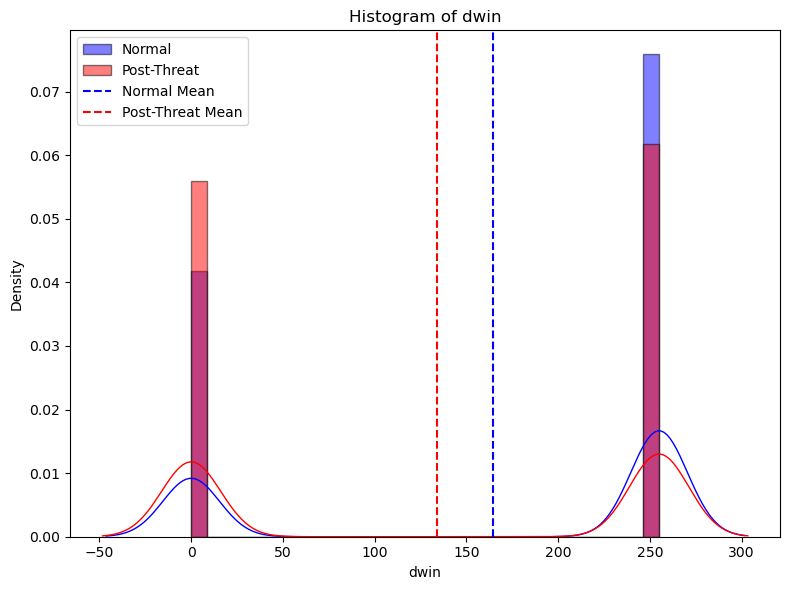

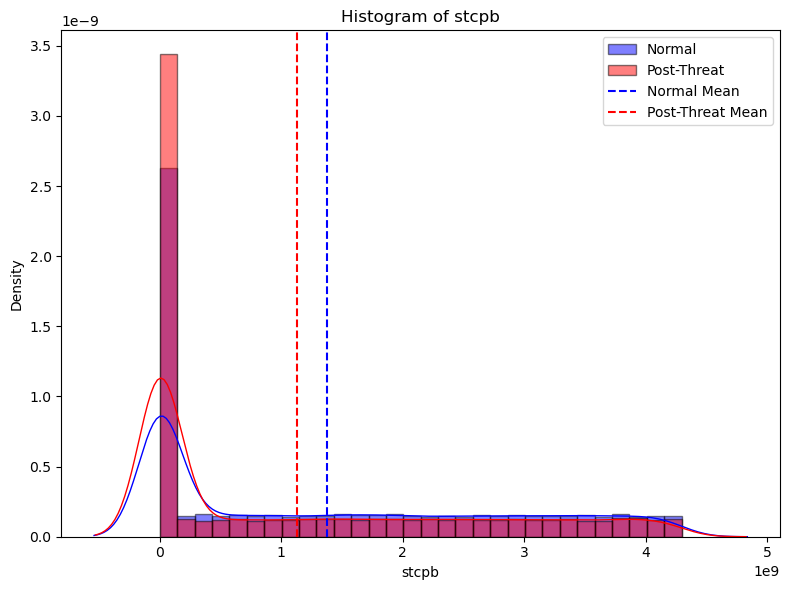

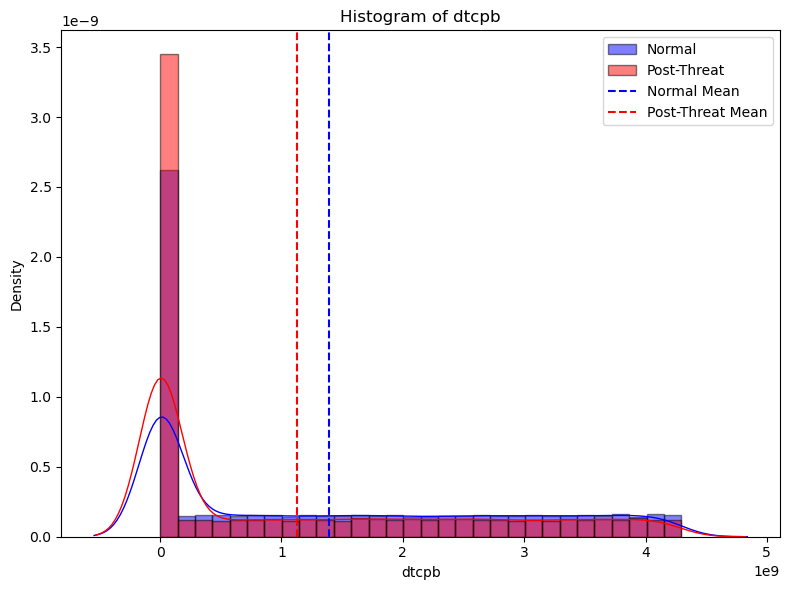

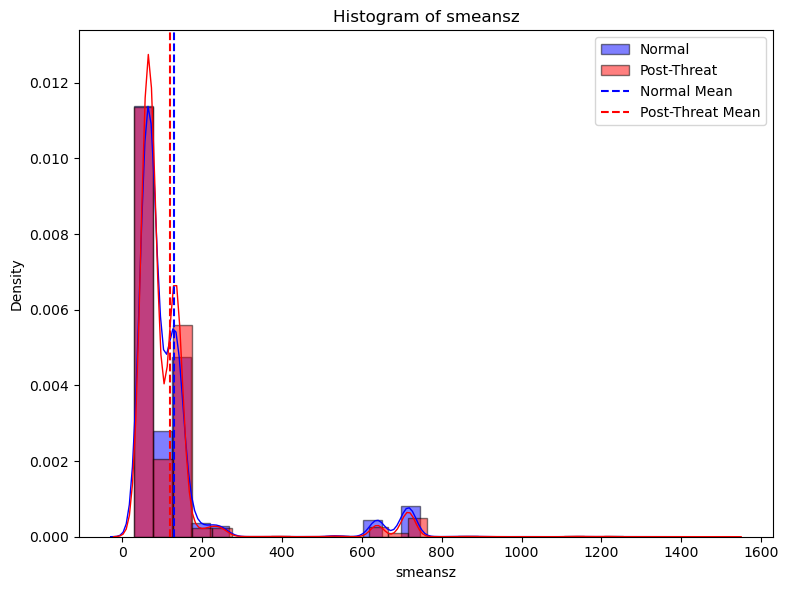

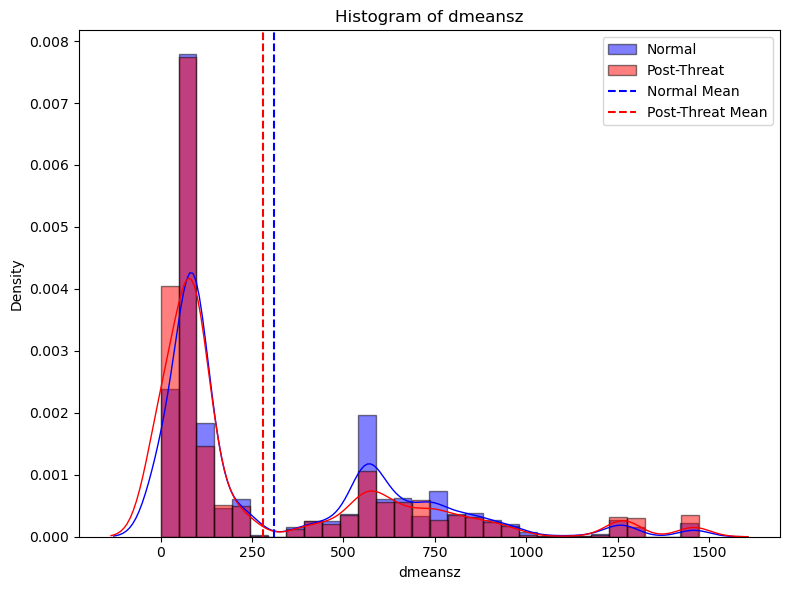

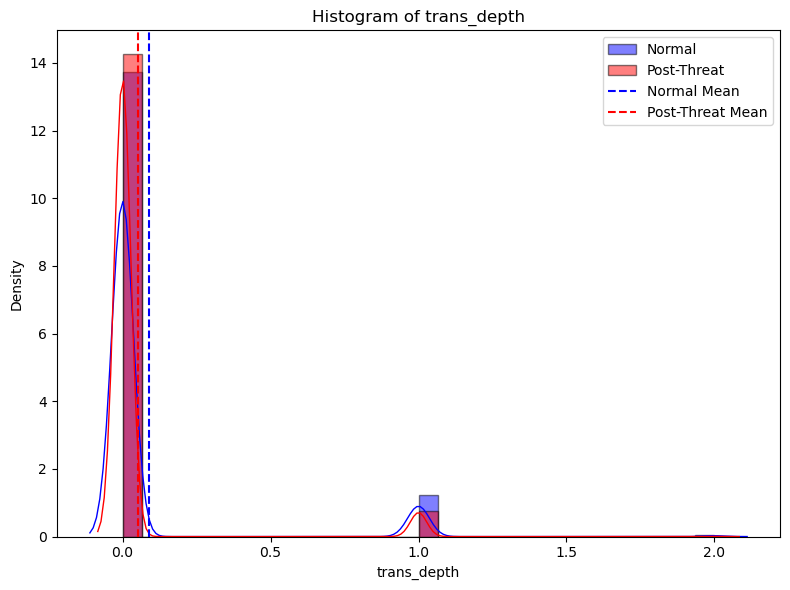

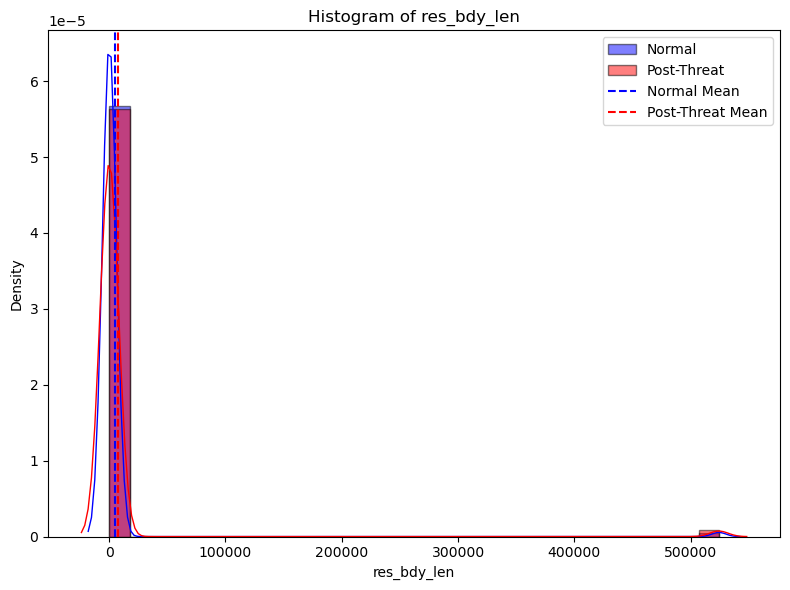

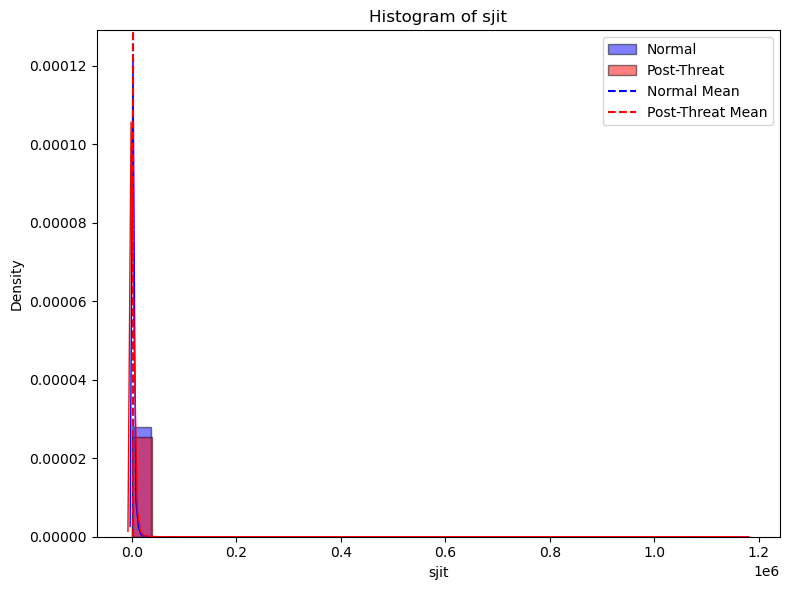

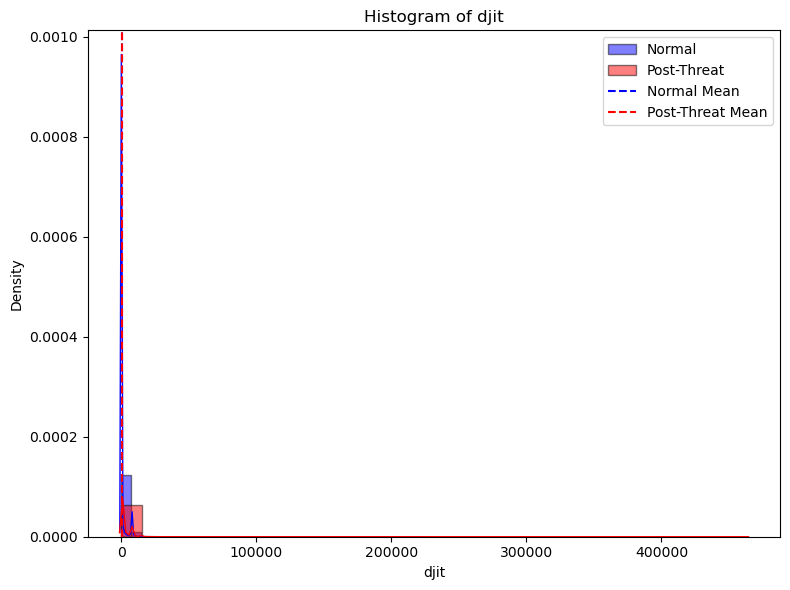

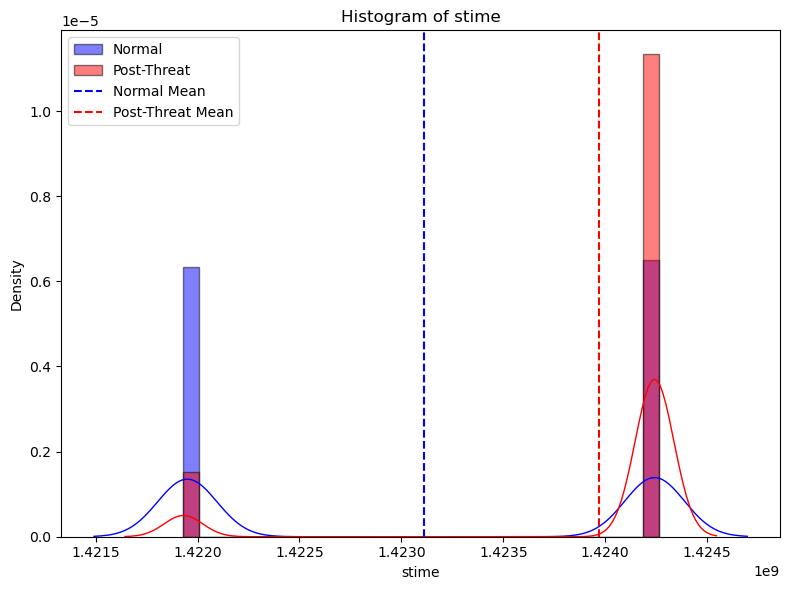

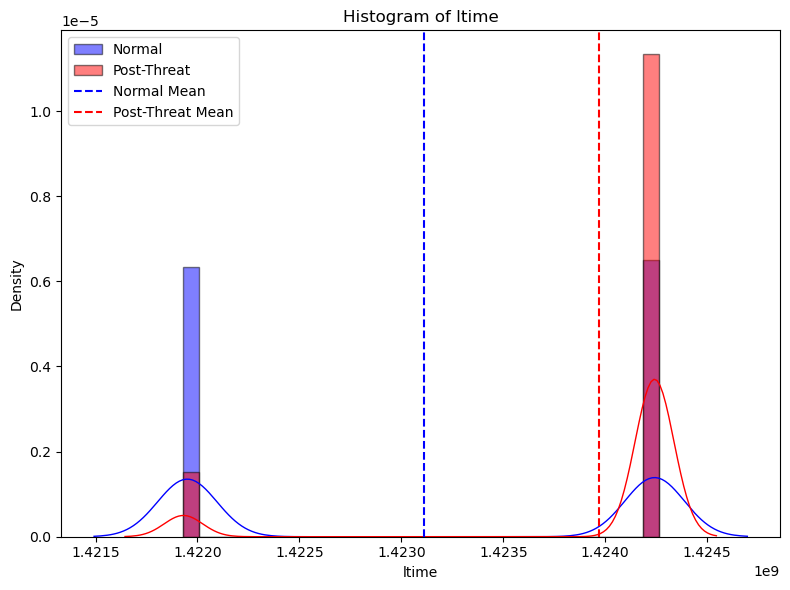

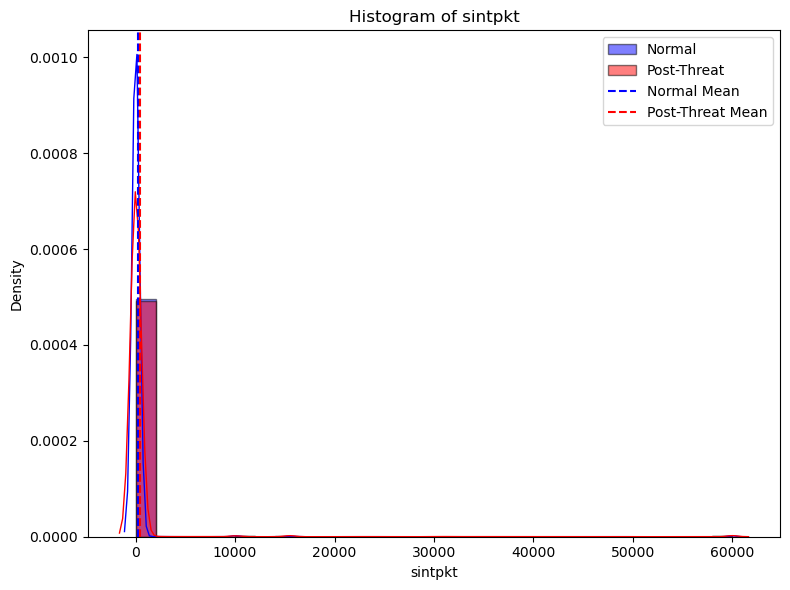

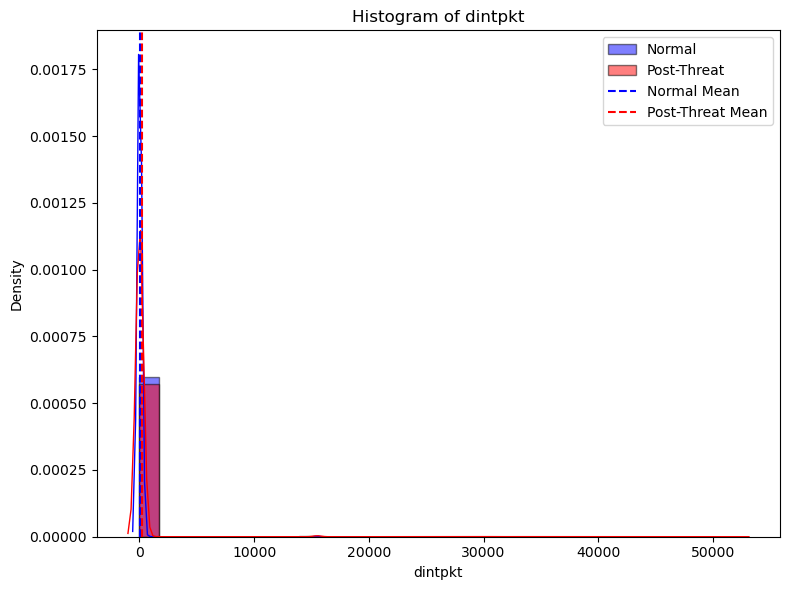

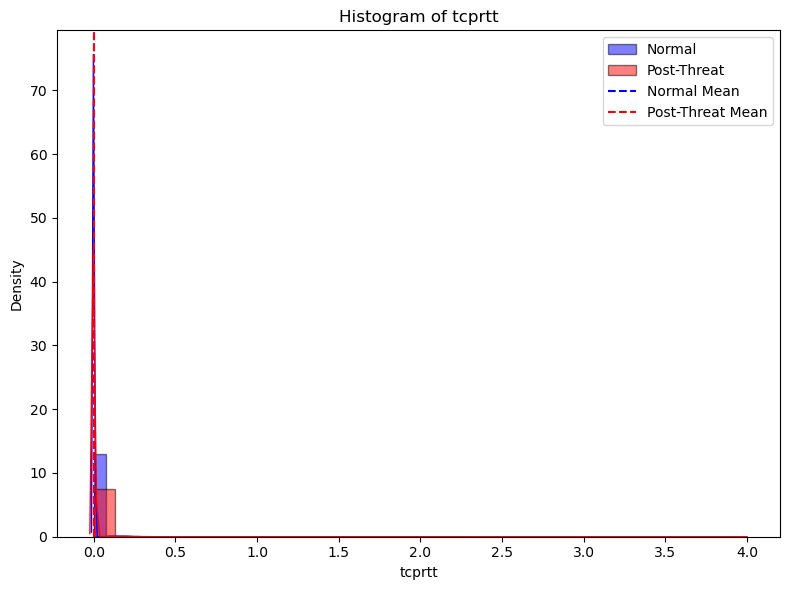

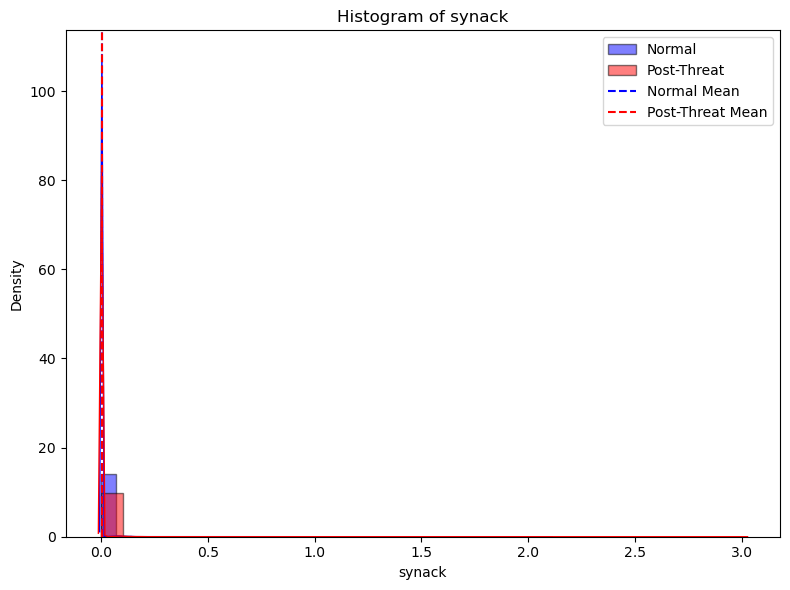

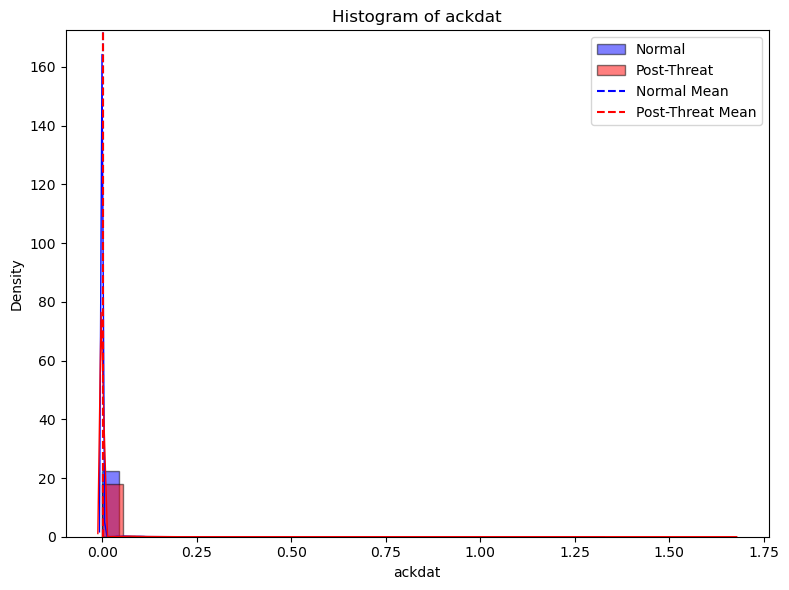

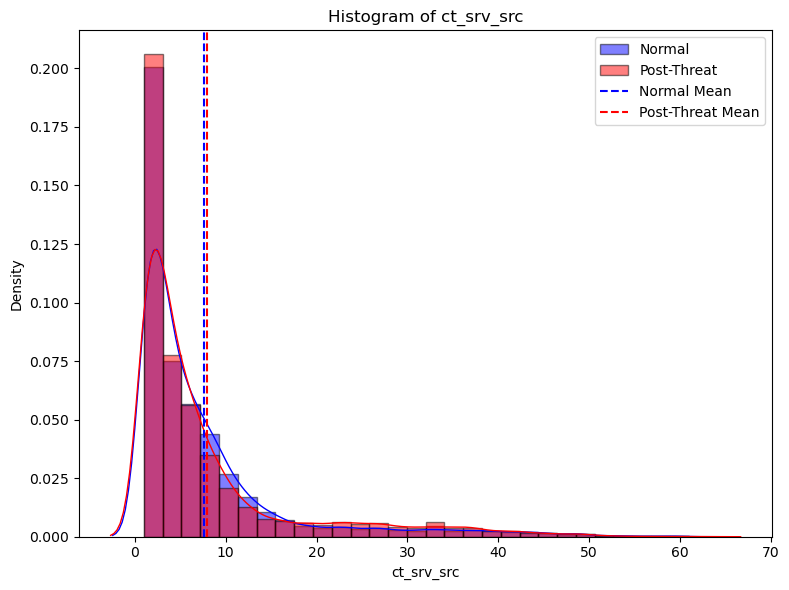

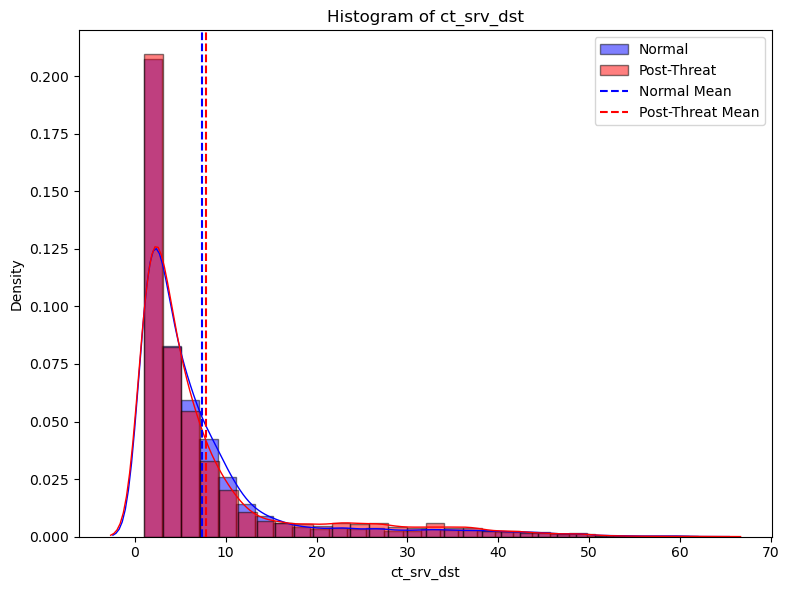

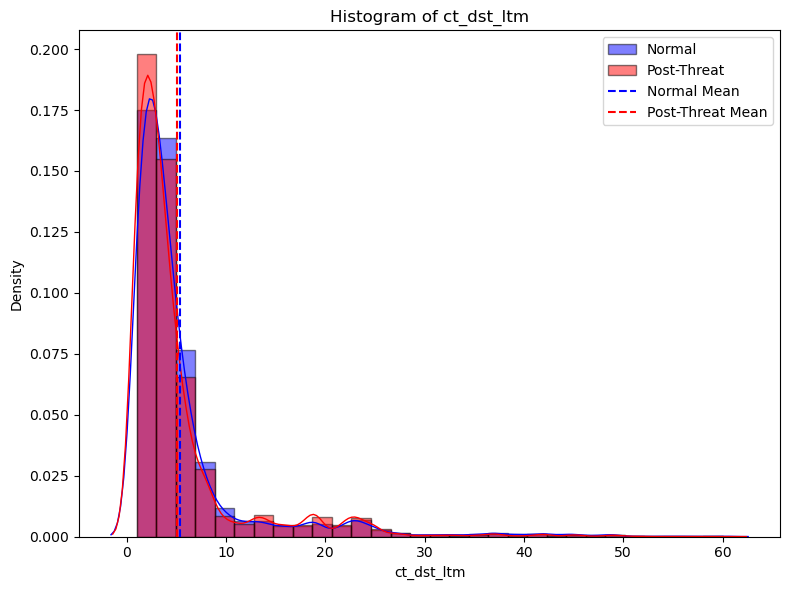

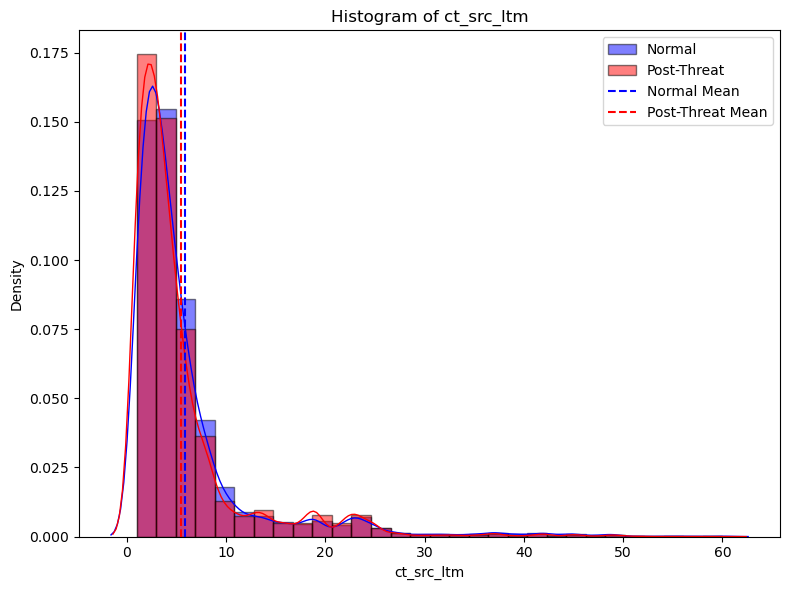

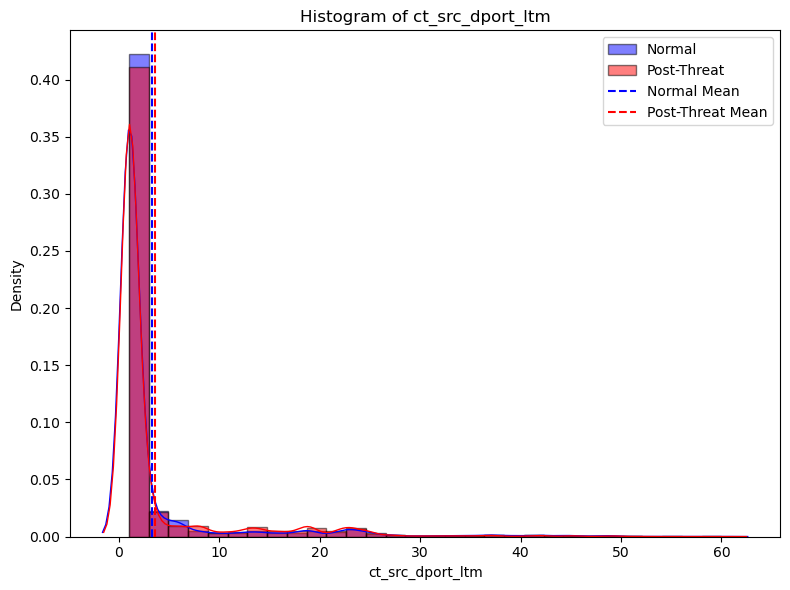

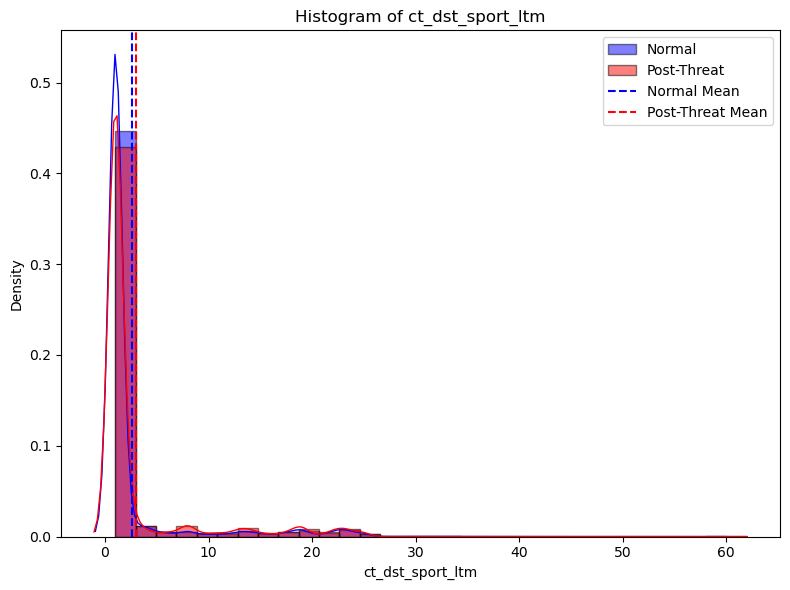

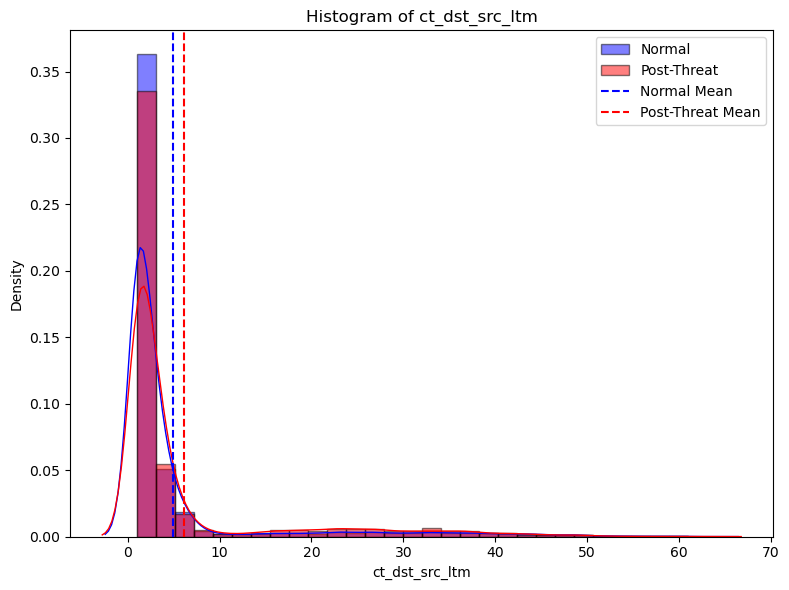

In [6]:
num_features = len(numerical_features)
# Go through each Normal and Pre-Threat Normal value and compare on histogram.
# No obvious difference seem to be found except for stime and ltime.
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(x3[feature], bins=30, alpha=0.5, label='Normal', color='blue', edgecolor='black', density=True)
    plt.hist(x2[feature], bins=30, alpha=0.5, label='Post-Threat', color='red', edgecolor='black', density=True)
    sns.kdeplot(x3[feature], color='blue', linewidth=1)
    sns.kdeplot(x2[feature], color='red', linewidth=1)
    mean_x3 = np.mean(x3[feature])
    mean_x2 = np.mean(x2[feature])
    plt.axvline(mean_x3, color='blue', linestyle='--', label='Normal Mean')
    plt.axvline(mean_x2, color='red', linestyle='--', label='Post-Threat Mean')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Before vs After Threat

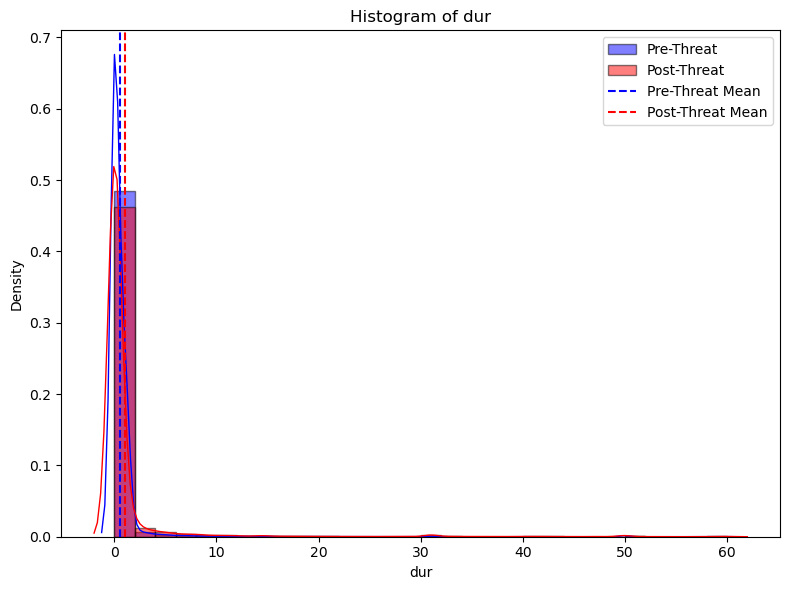

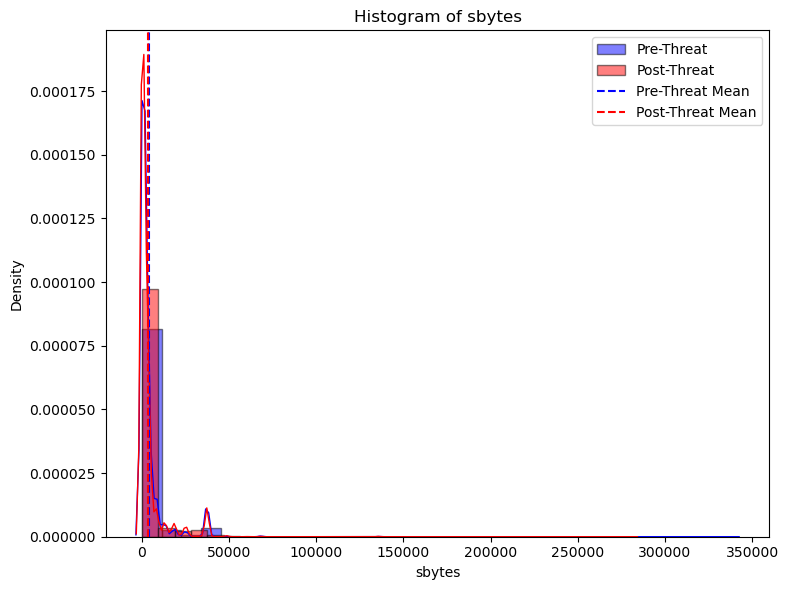

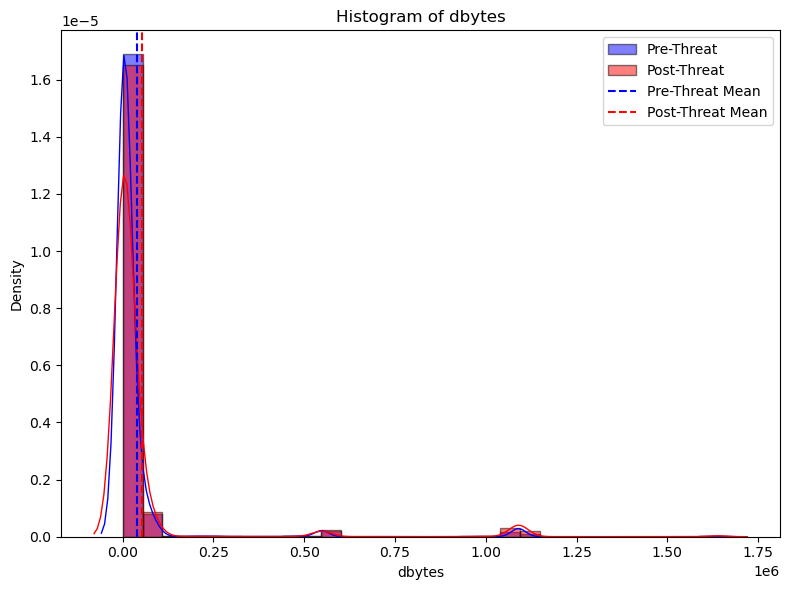

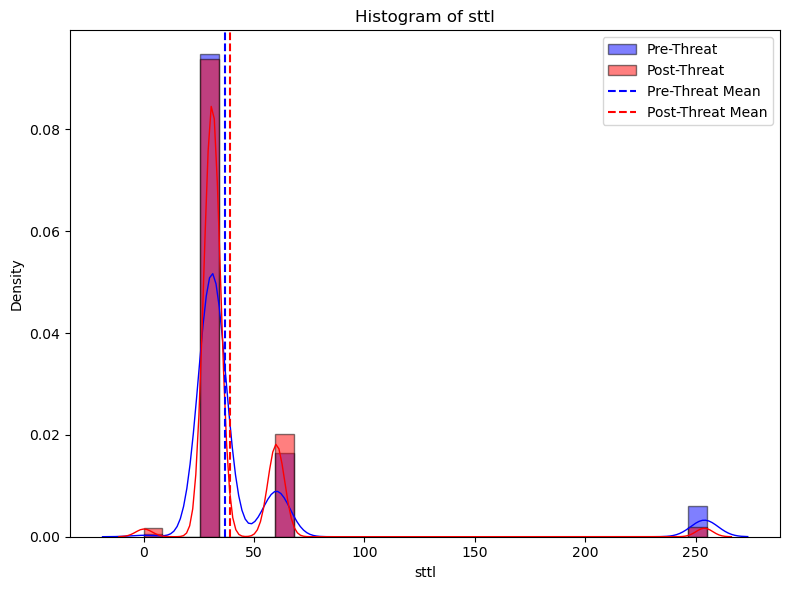

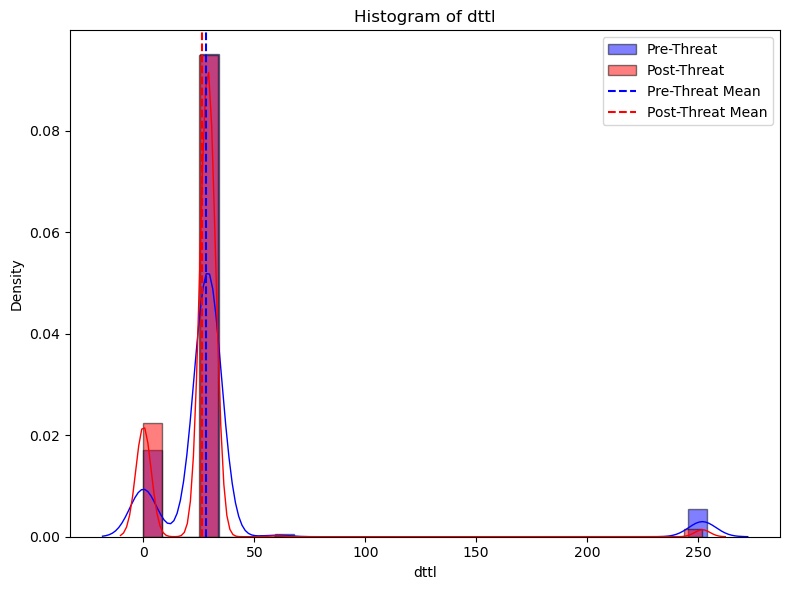

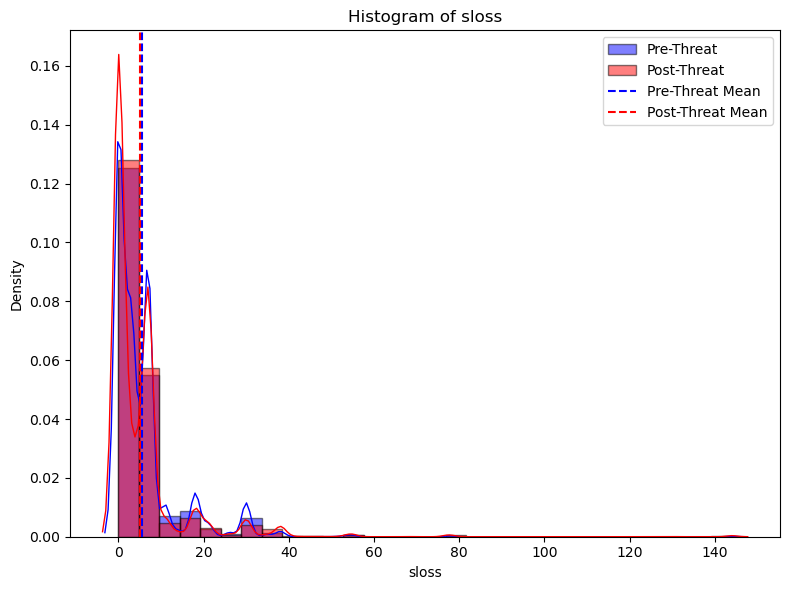

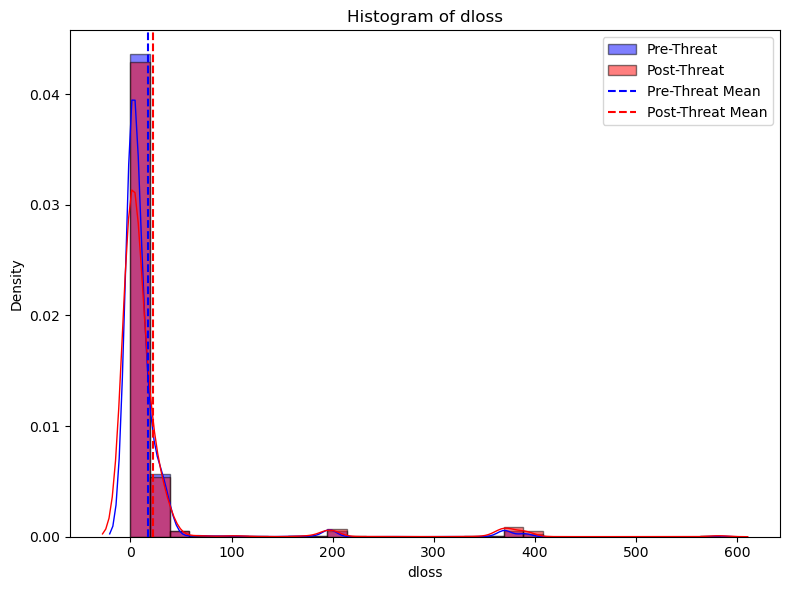

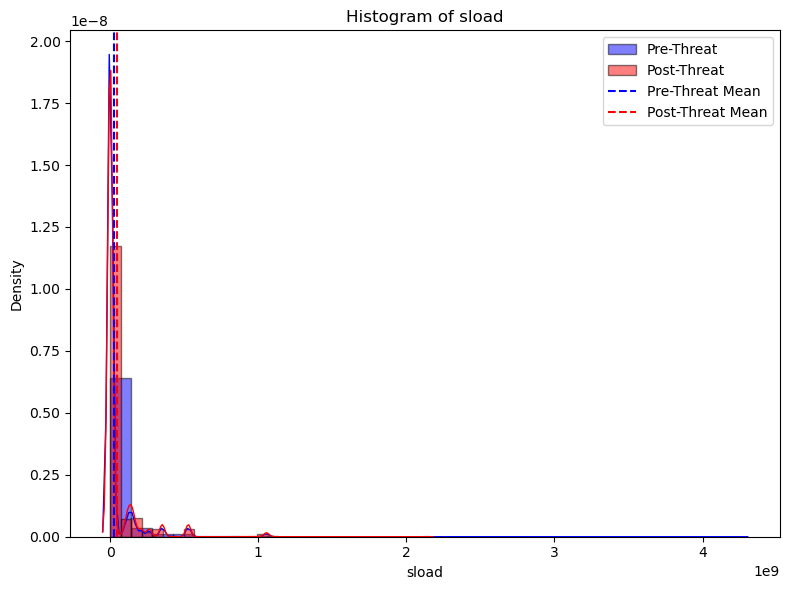

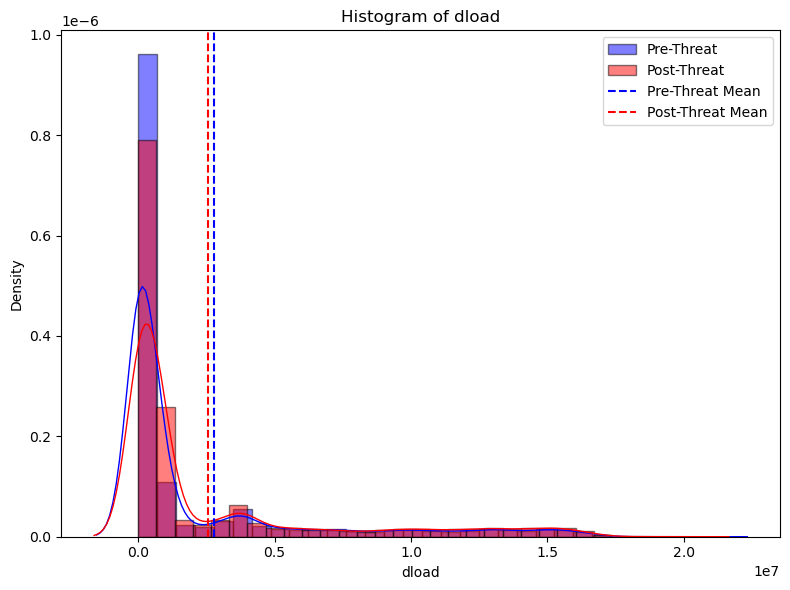

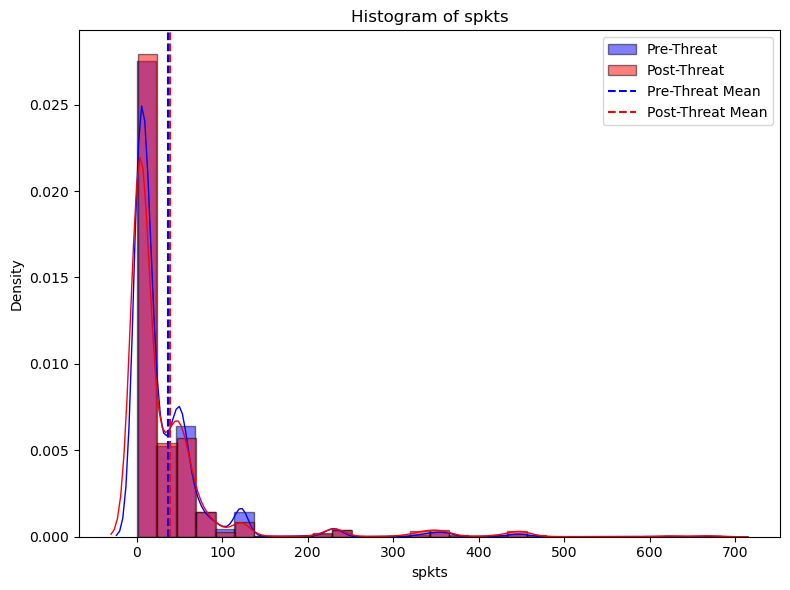

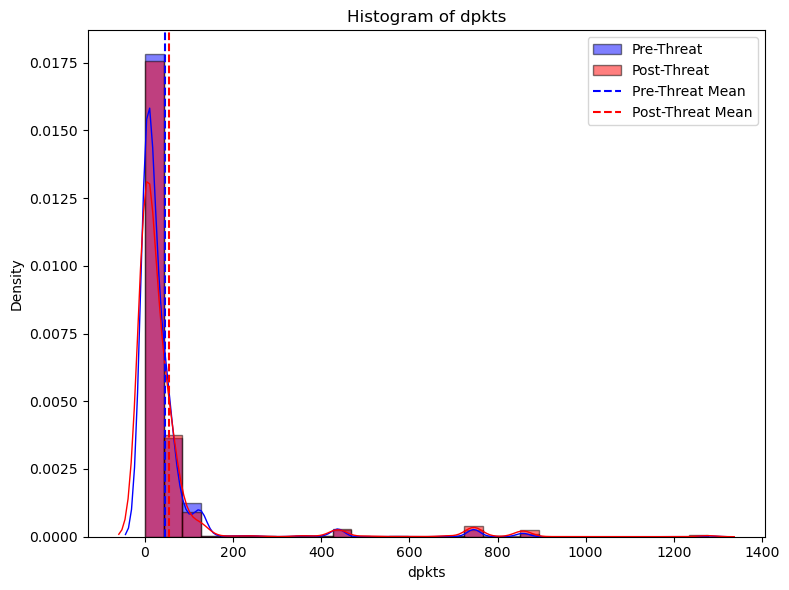

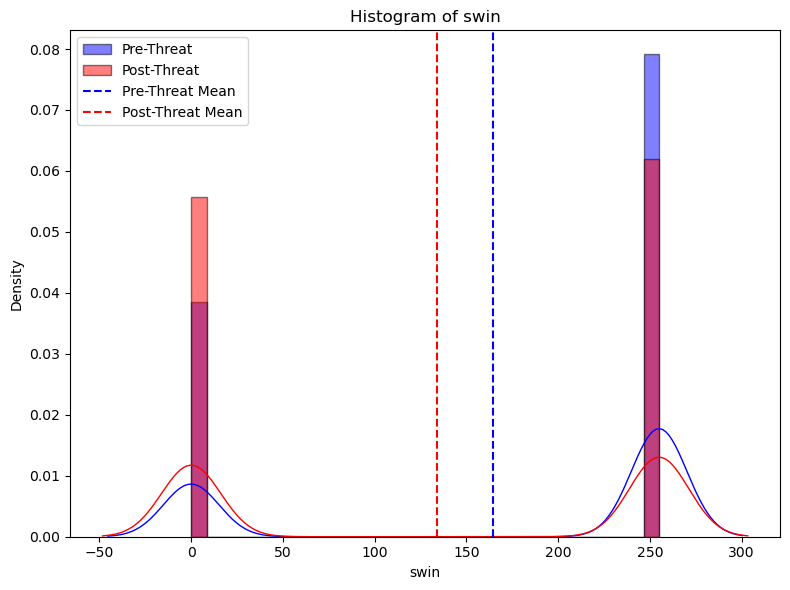

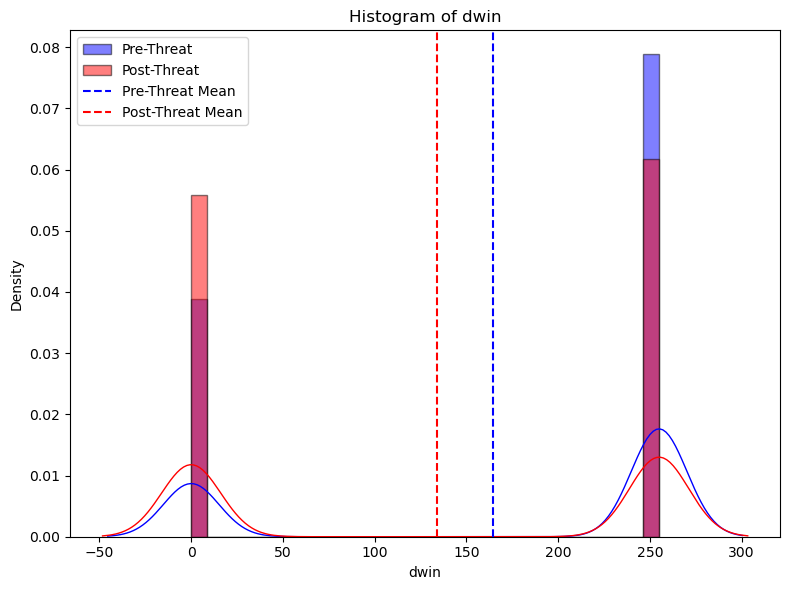

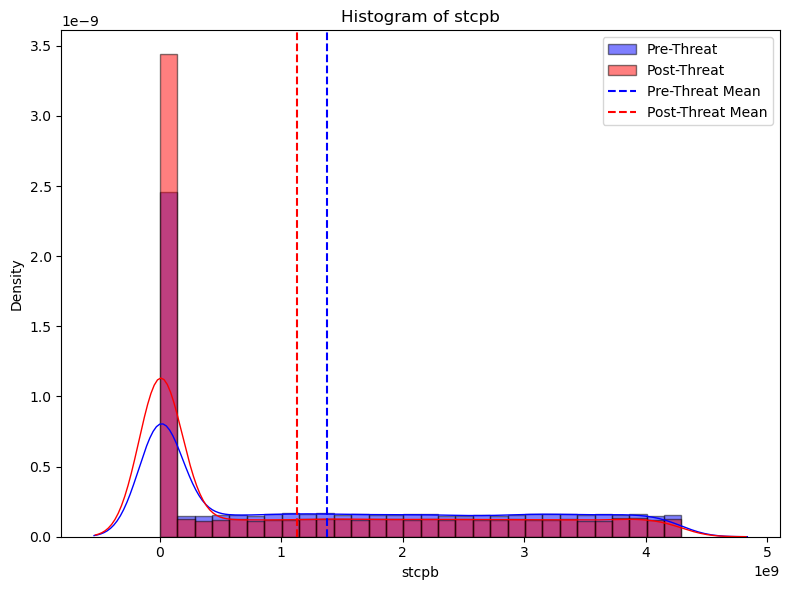

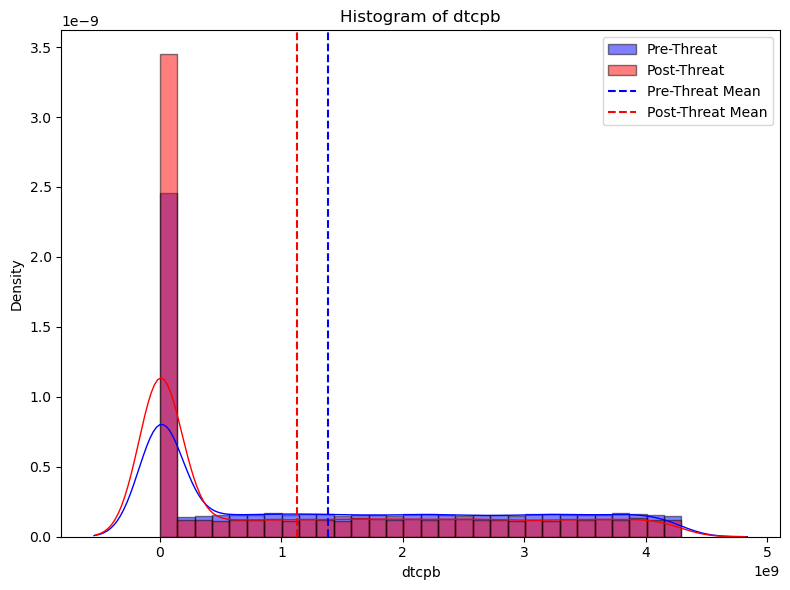

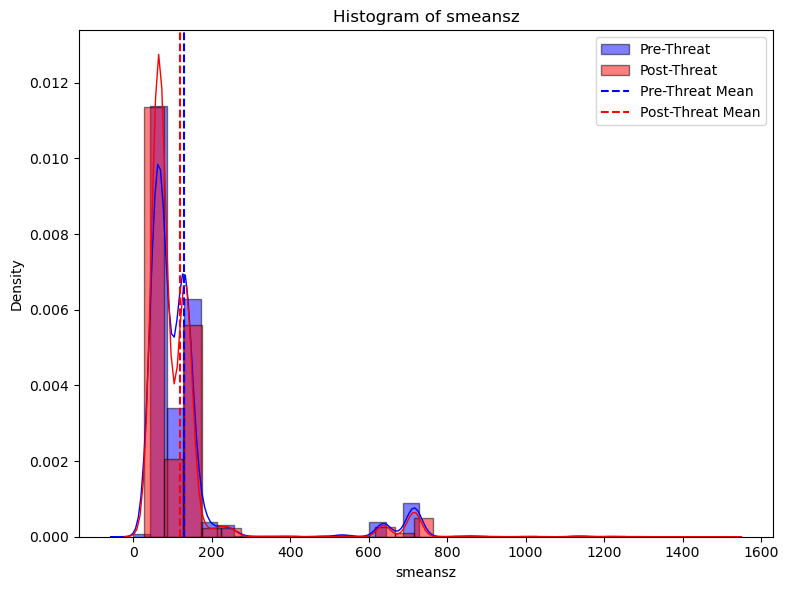

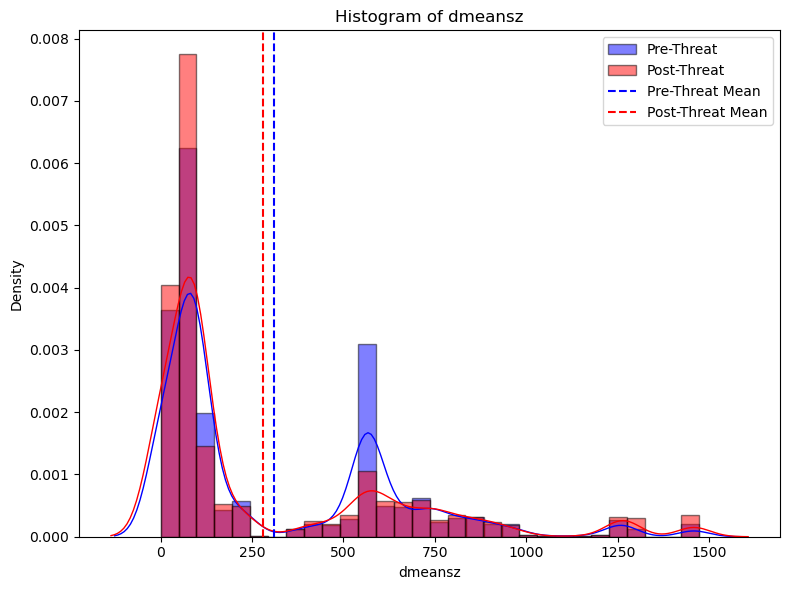

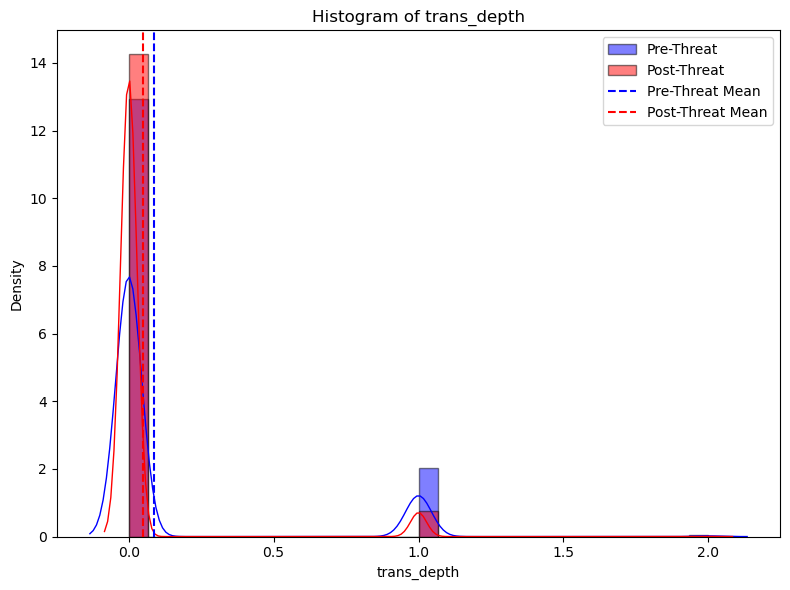

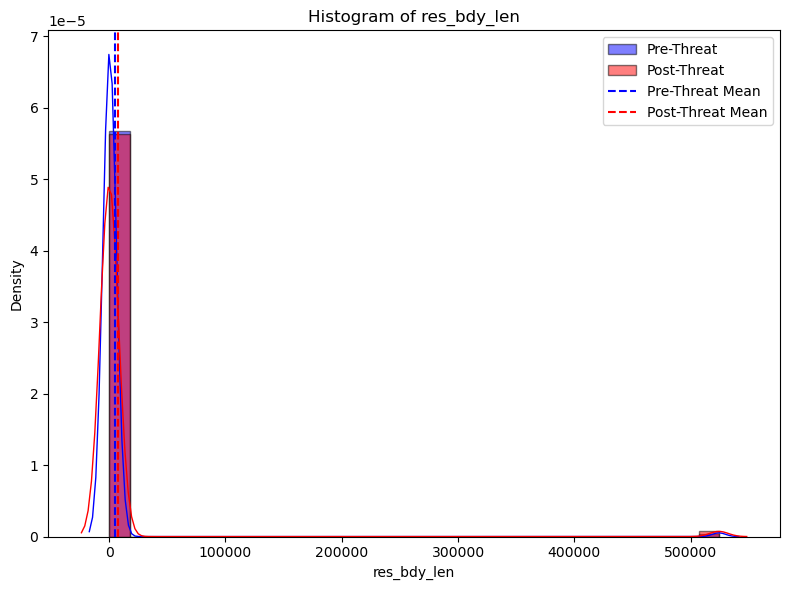

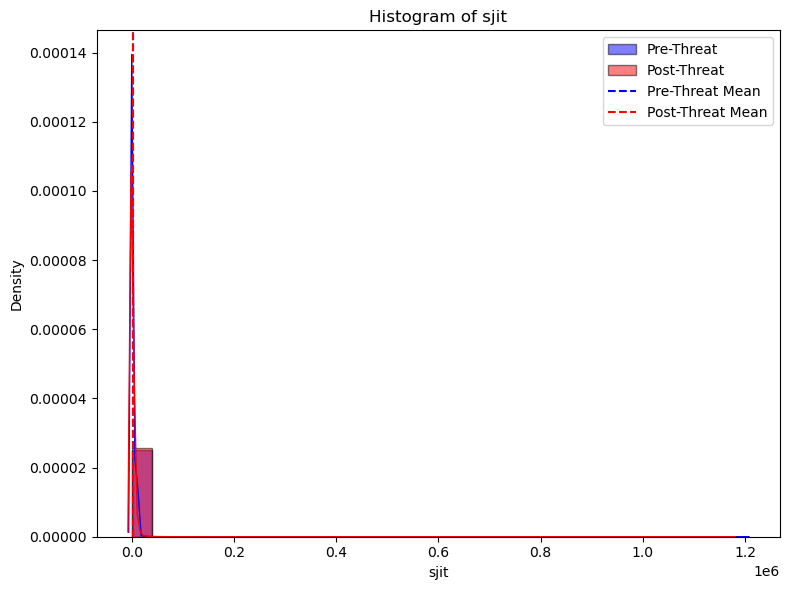

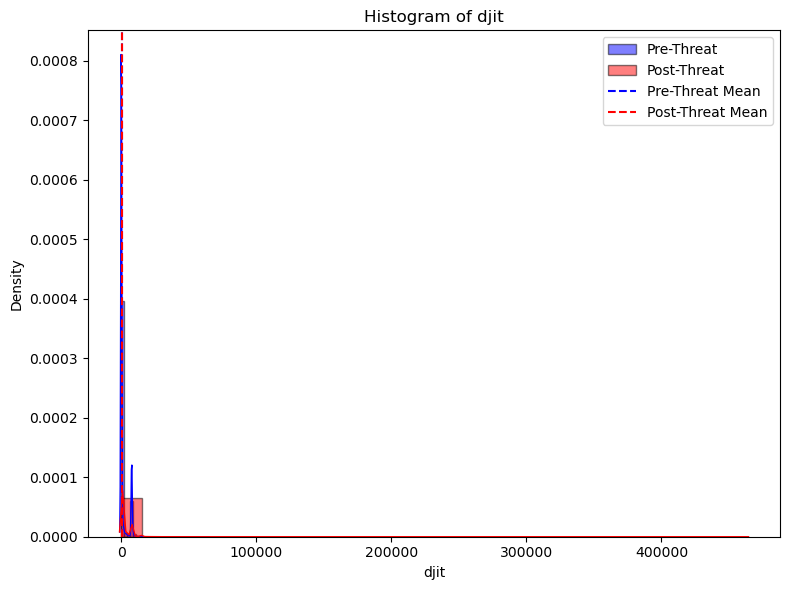

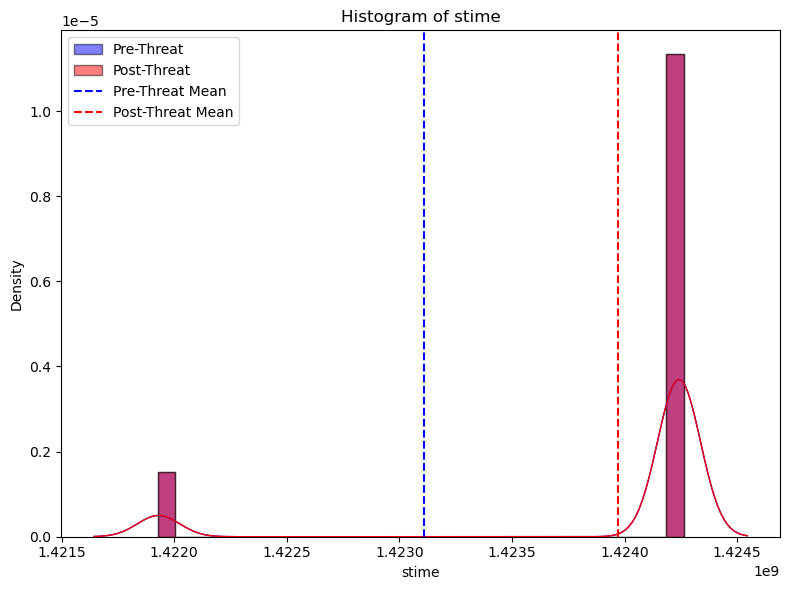

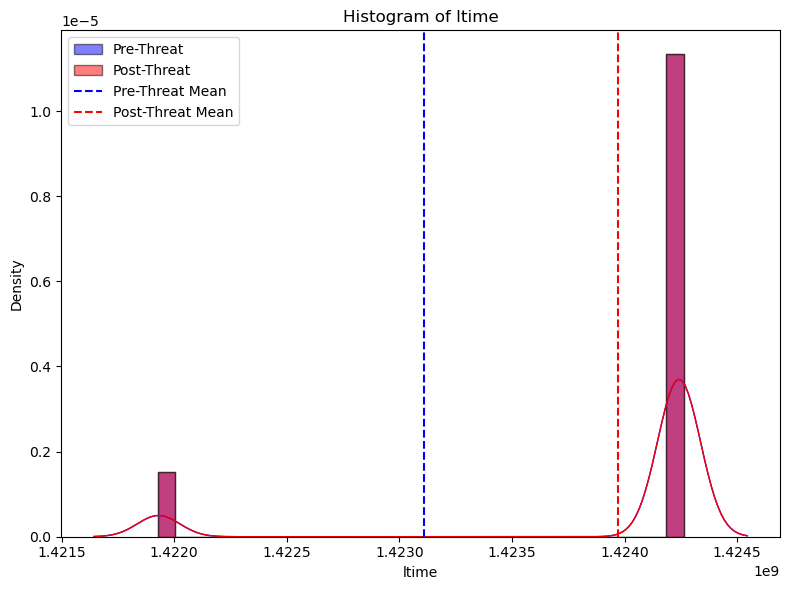

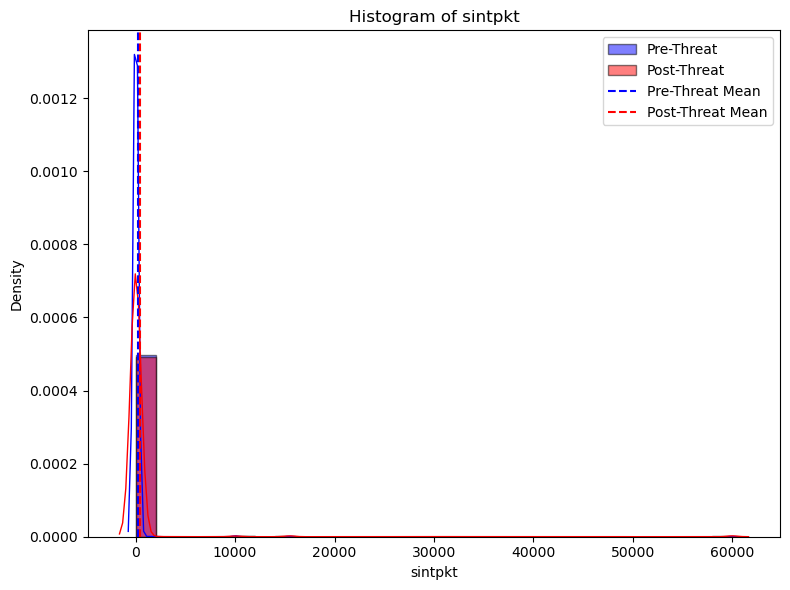

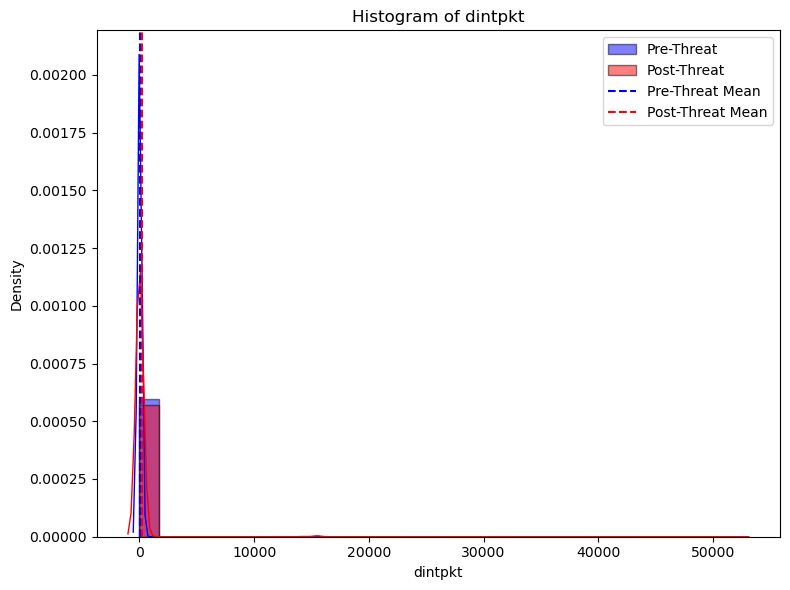

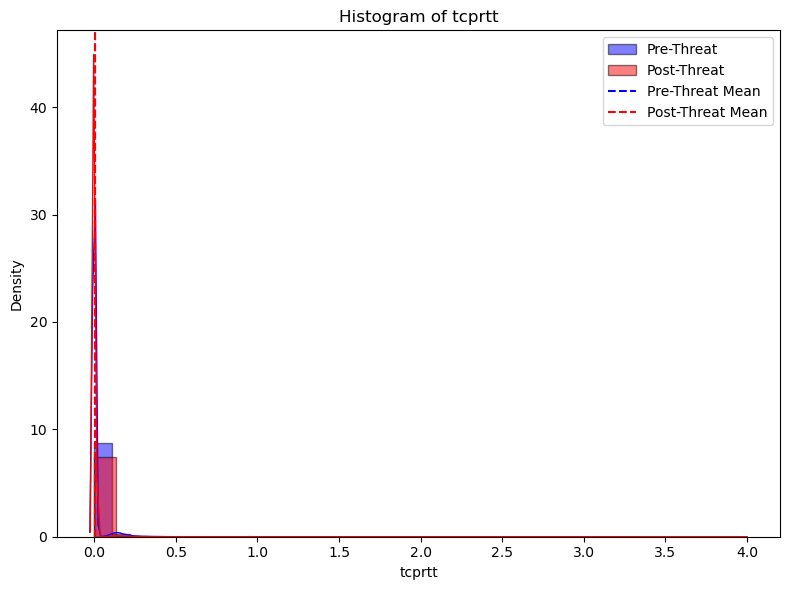

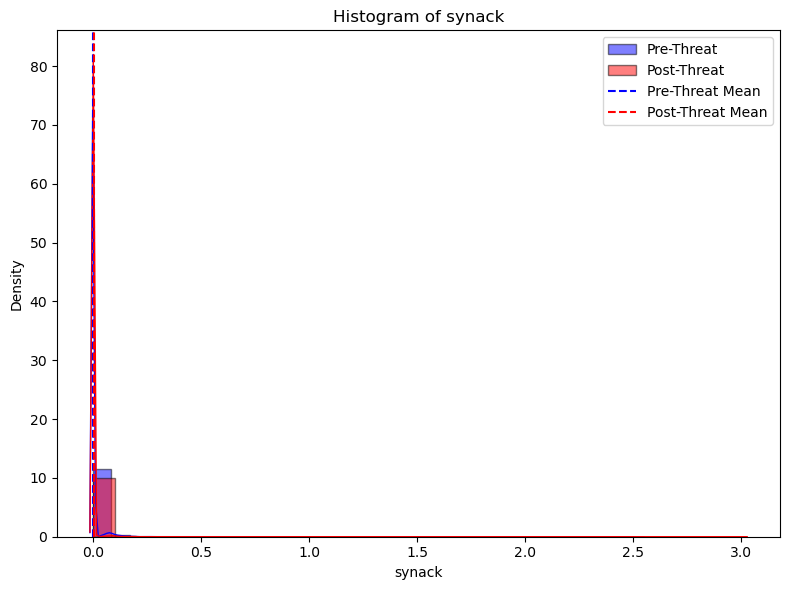

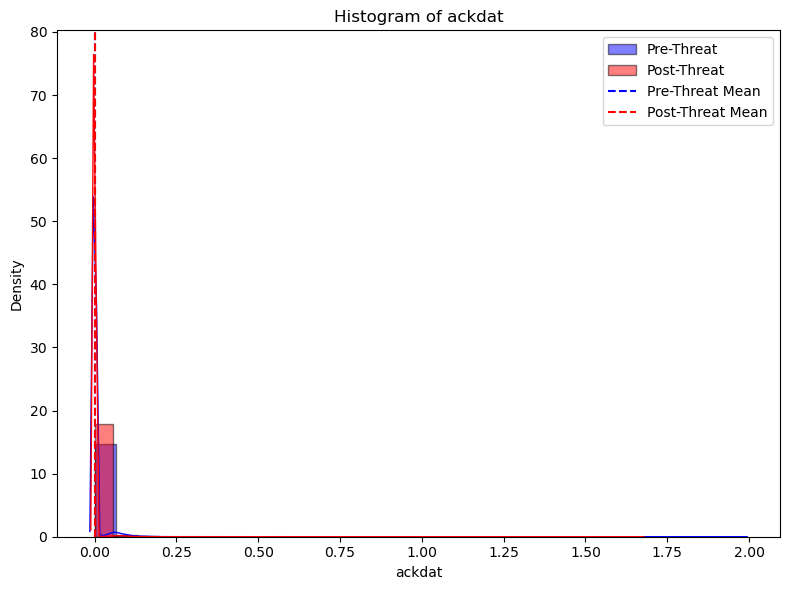

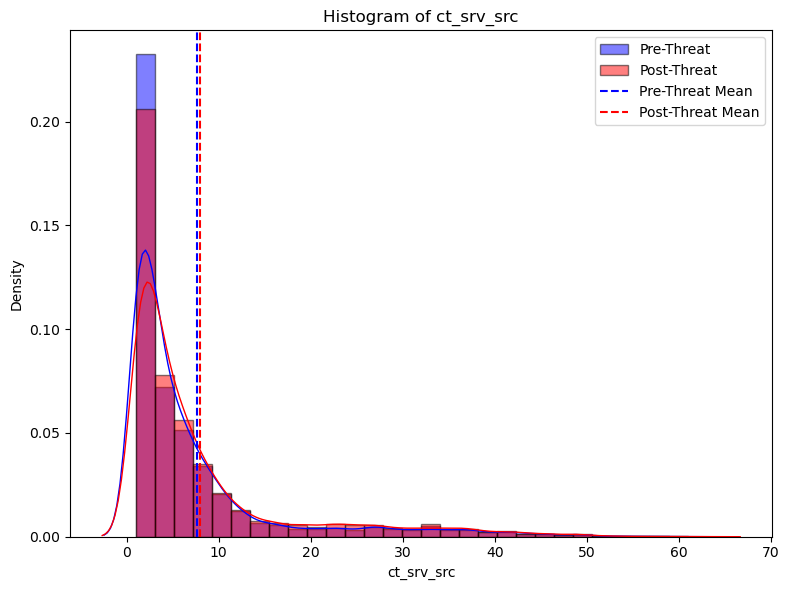

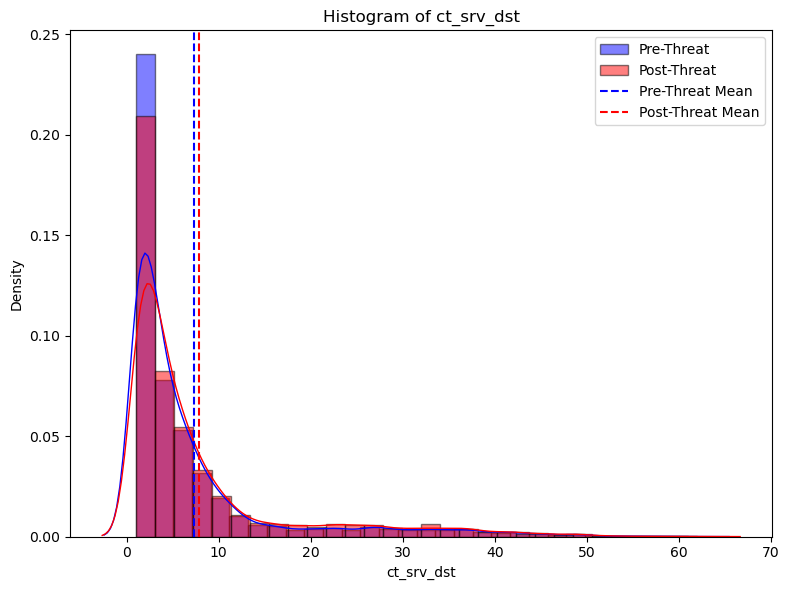

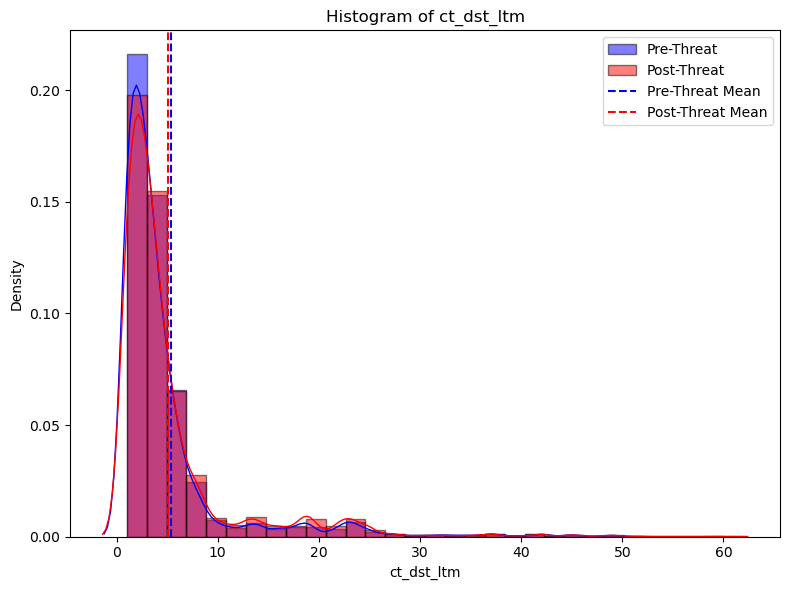

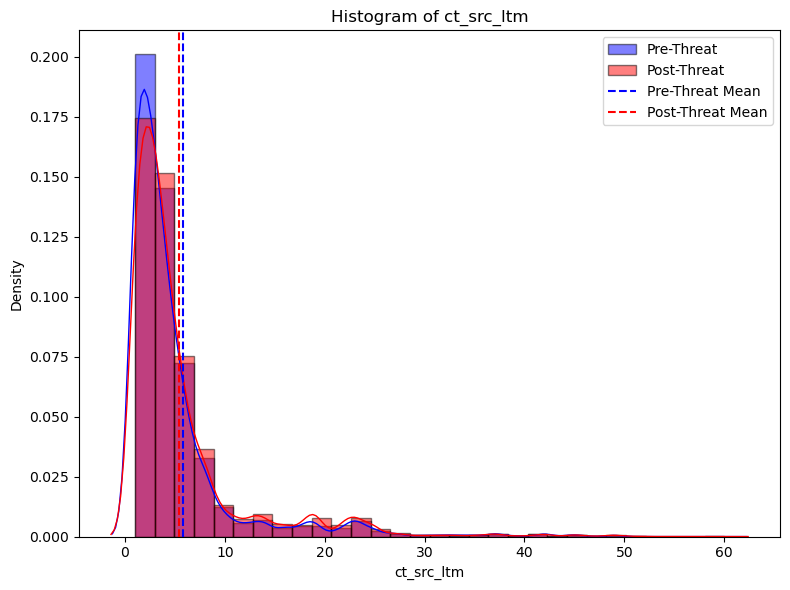

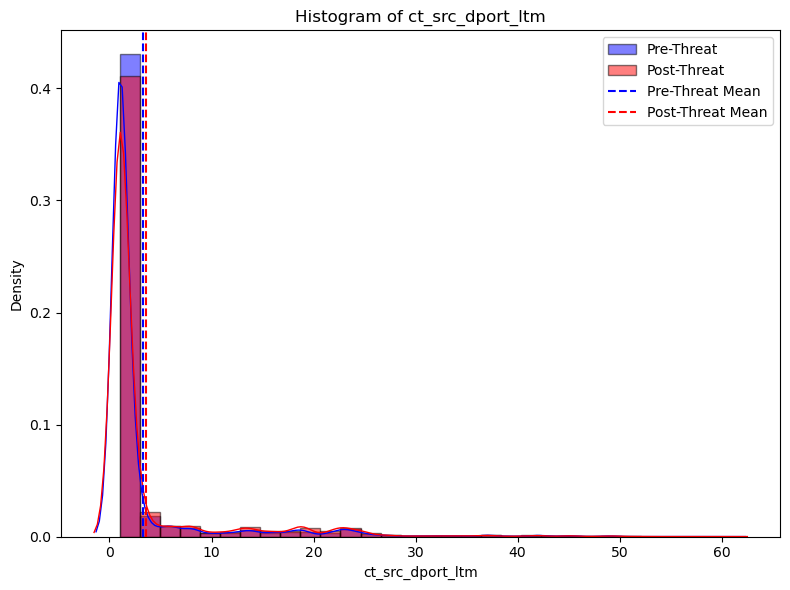

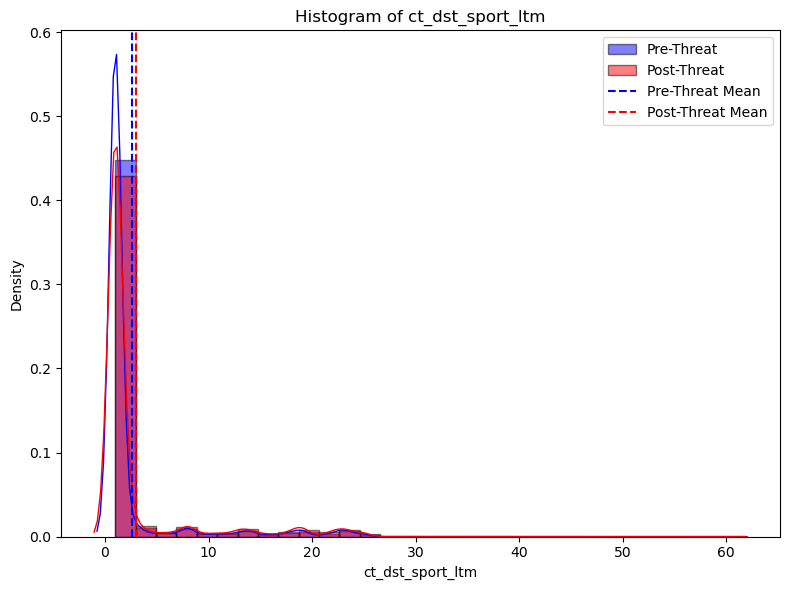

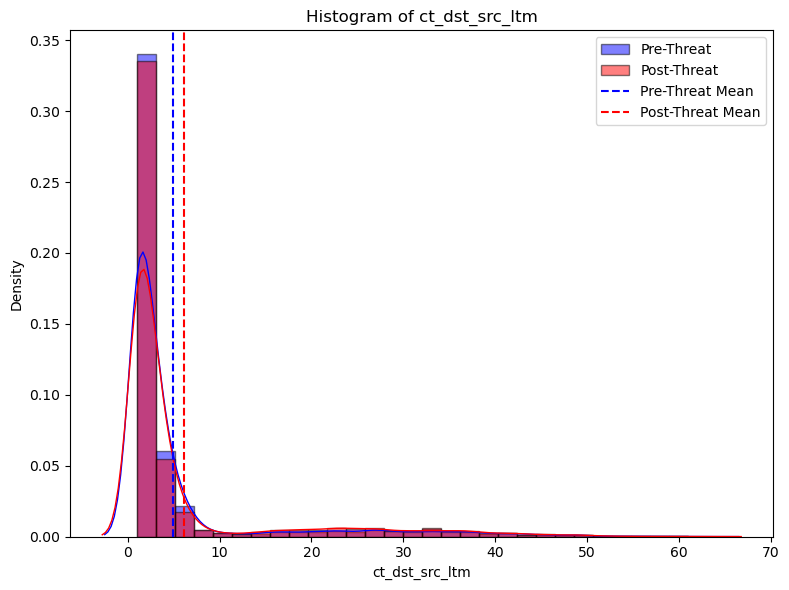

In [8]:
num_features = len(numerical_features)
# Go through each Normal and Pre-Threat Normal value and compare on histogram.
# No obvious difference seem to be found except for stime and ltime.
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    plt.hist(x1[feature], bins=30, alpha=0.5, label='Pre-Threat', color='blue', edgecolor='black', density=True)
    plt.hist(x2[feature], bins=30, alpha=0.5, label='Post-Threat', color='red', edgecolor='black', density=True)
    sns.kdeplot(x1[feature], color='blue', linewidth=1)
    sns.kdeplot(x2[feature], color='red', linewidth=1)
    mean_x1 = np.mean(x3[feature])
    mean_x2 = np.mean(x2[feature])
    plt.axvline(mean_x1, color='blue', linestyle='--', label='Pre-Threat Mean')
    plt.axvline(mean_x2, color='red', linestyle='--', label='Post-Threat Mean')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()